## Intro

Charts to Do:

- [x] guide 1 alone
- [x] guide 2 alone
- [x] stats tests to show normality etc of data
- [x] kinietic assays (shgow the plateus all conc)
- [x] Indiivudal Charts for clinic pos quotient
- [x] Indiivudal Charts for clinic pos bhq
- [?] Indiivudal Charts for clinic neg quotient
- [?] Indiivudal Charts for clinic neg bhq
- [x]  adsorbtion study
- [x] fam and tamra absorbance spectra

In [1]:
# Imports

import importlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats, fft
import scipy.signal as signal
import statsmodels.api as sm
import seaborn as sns
import math
import numpy as np
import matplotlib as mpl
import matplotlib
import os
from matplotlib.ticker import FormatStrFormatter
#from pyts.decomposition import SingularSpectrumAnalys isl
import nktools as nk
import nkplot as nkp
import inspect
import re
from dotmap import DotMap
from scipy.optimize import curve_fit



importlib.reload(nk)
importlib.reload(nkp)

#plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

# some info for charting
# Some universal graphic constants
std_mult = 3
neg_std_mult = 3
cm = 1/2.54

# Guides 1 and 2 Alone

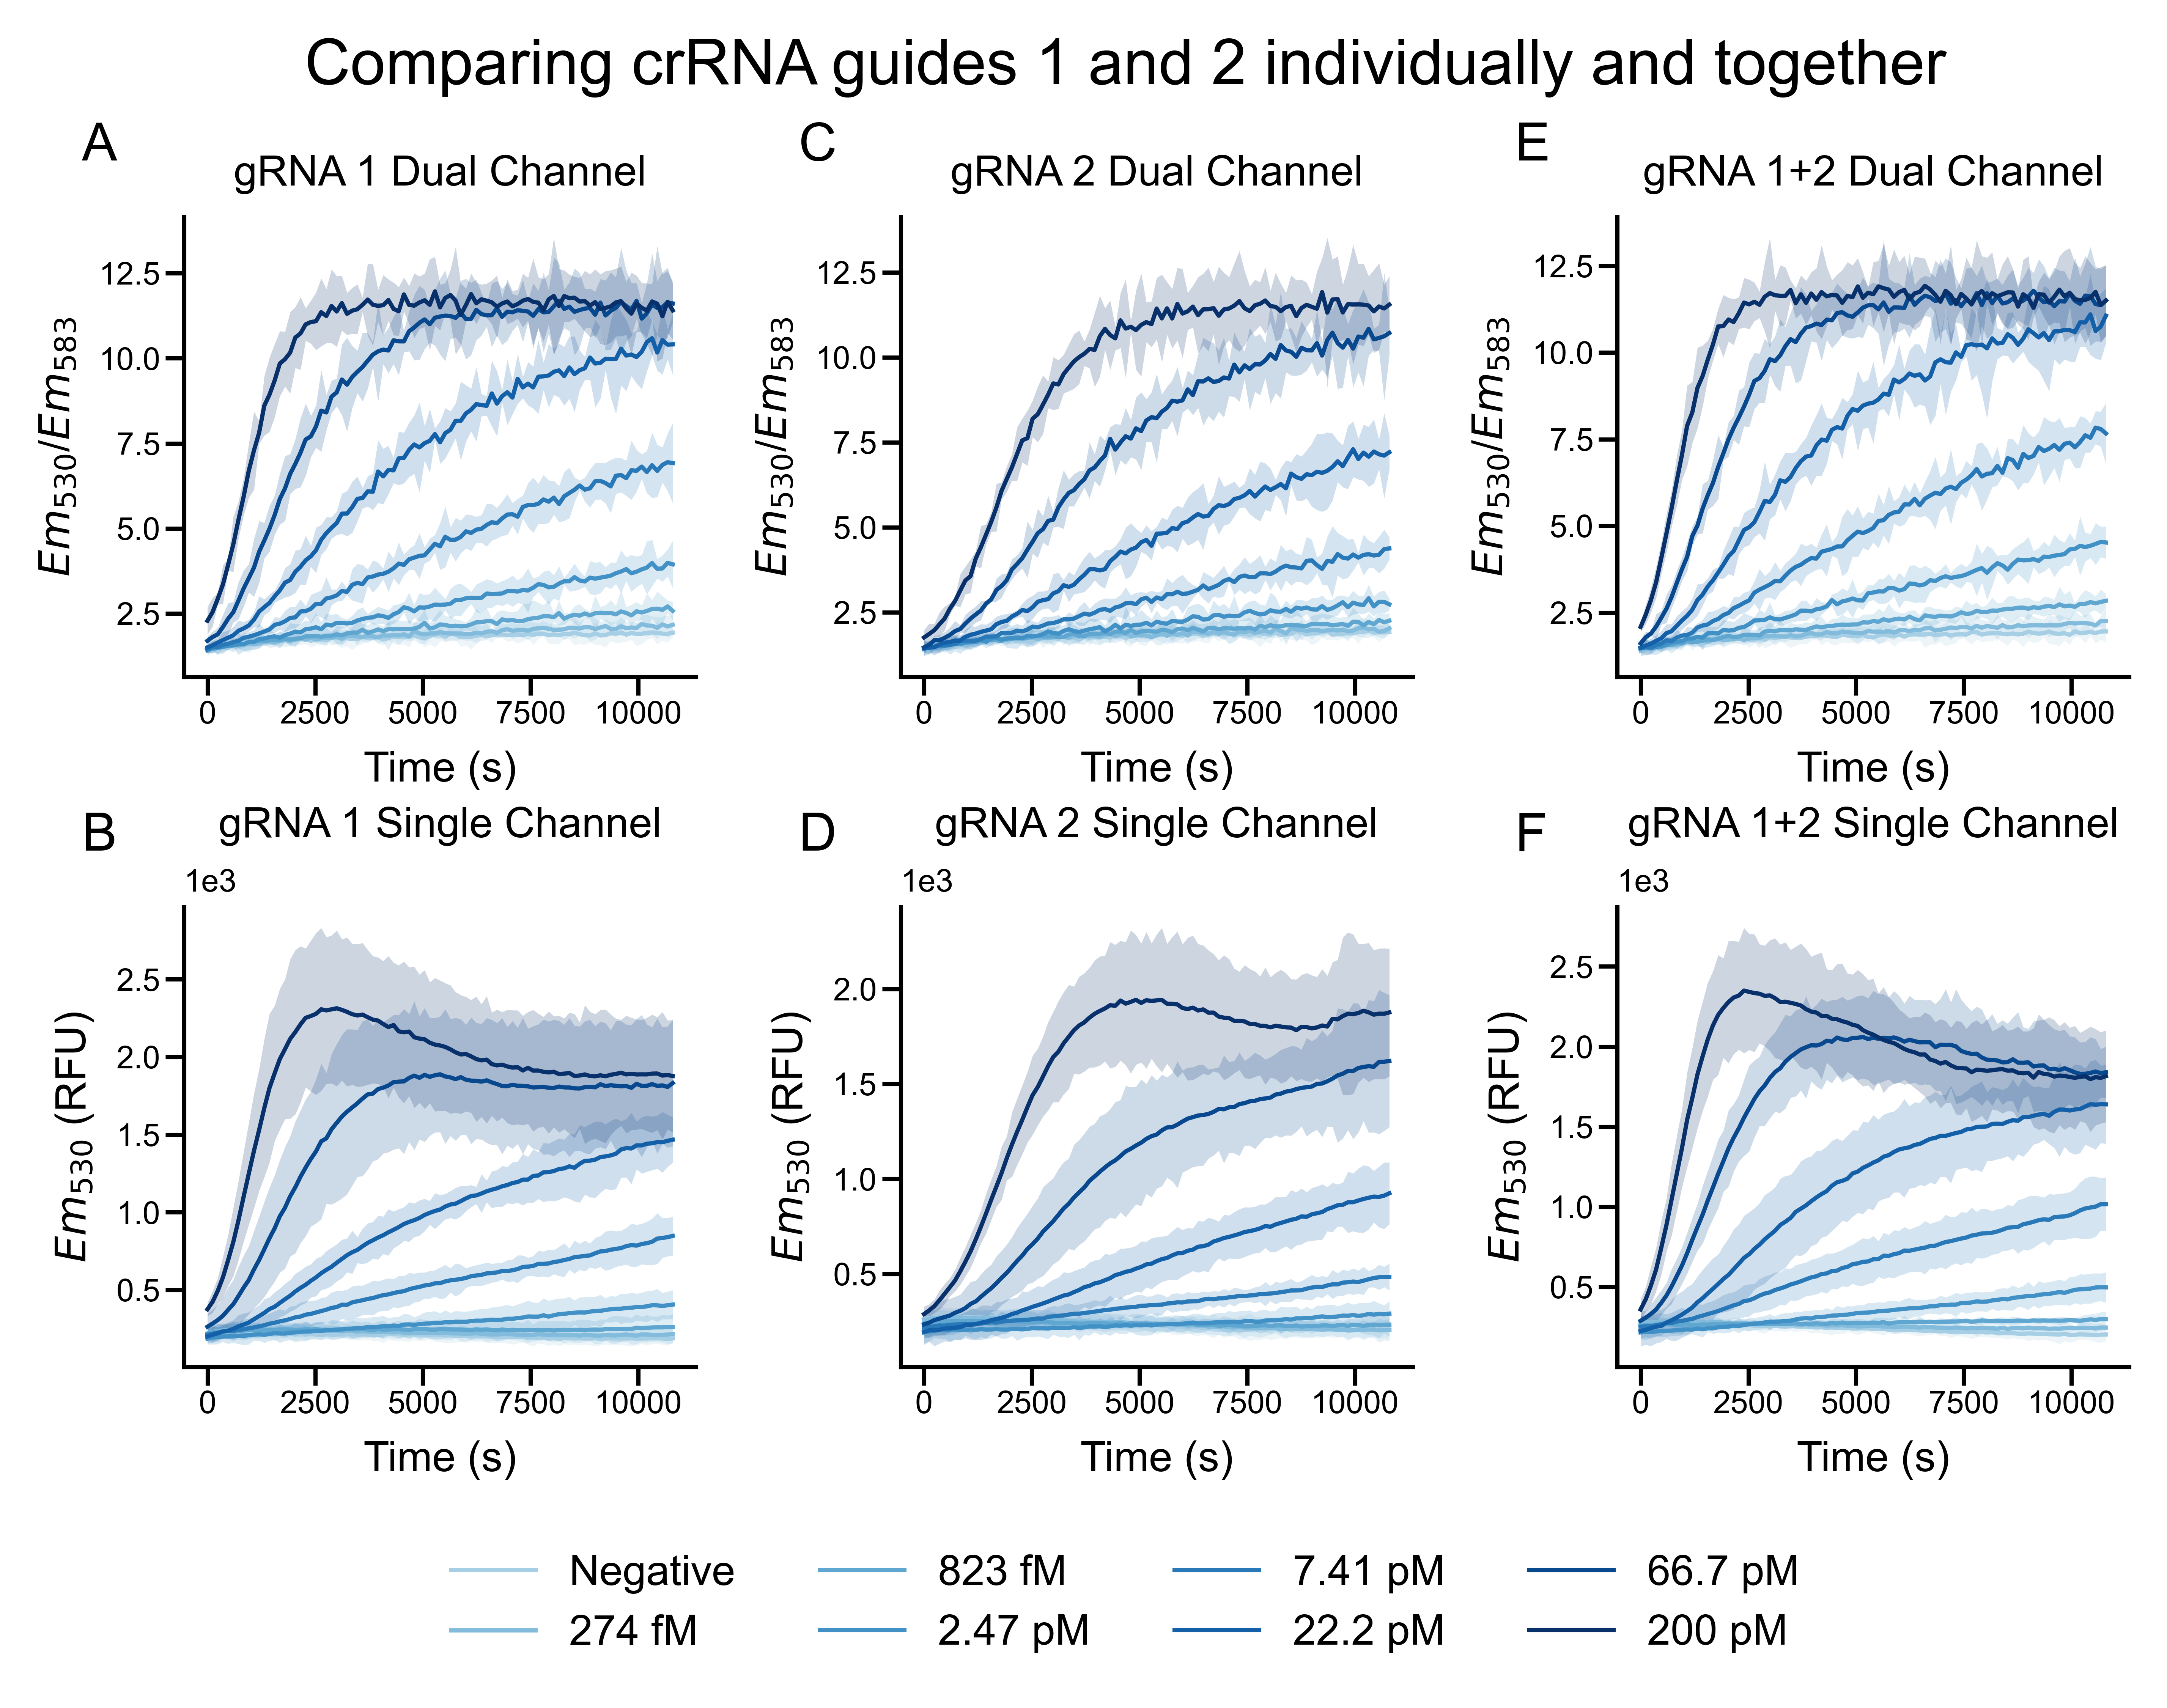

In [2]:
# Read the data

fig4data_path = '../../data/raw_data/21072023_3step_allgRNAs.csv'



grna1_f4_wells = {
    'neg' : {'H1', 'H2', 'H3', 'H4', 'H5'}, # negtive
    '274fm' : {'G1', 'G2', 'G3', 'G4', 'G5'}, # '274fm HPV16 Target DNA'
    '823fm' : {'F1', 'F2', 'F3', 'F4', 'F5'}, # '823fm HPV16 Target DNA'
    '2.47pM' : {'E1', 'E2', 'E3', 'E4', 'E5'}, # '2.47pM HPV16 Target DNA'
    '7.41pM' : {'D1', 'D2', 'D3', 'D4', 'D5'}, # '7.41pM HPV16 Target DNA'
    '22.2pM' : {'C1', 'C2', 'C3', 'C4', 'C5'}, # '22.2pM HPV16 Target DNA'
    '66.7pM' : {'B1', 'B2', 'B3', 'B4', 'B5'}, # '66.7pM HPV16 Target DNA'
    '200pM' : {'A1', 'A2', 'A3', 'A4', 'A5'}, # '200pM HPV16 Target DNA'
}

grna2v2_f4_wells = {
    'neg' : {'H6', 'H7', 'H8', 'H9', 'H10'}, # negtive
    '274fm' : {'G6', 'G7', 'G8', 'G9', 'G10'}, # '274fm HPV16 Target DNA'
    '823fm' : {'F6', 'F7', 'F8', 'F9', 'F10'}, # '823fm HPV16 Target DNA'
    '2.47pM' : {'E6', 'E7', 'E8', 'E9', 'E10'}, # '2.47pM HPV16 Target DNA'
    '7.41pM' : {'D6', 'D7', 'D8', 'D9', 'D10'}, # '7.41pM HPV16 Target DNA'
    '22.2pM' : {'C6', 'C7', 'C8', 'C9', 'C10'}, # '22.2pM HPV16 Target DNA'
    '66.7pM' : {'B6', 'B7', 'B8', 'B9', 'B10'}, # '66.7pM HPV16 Target DNA'
    '200pM' : {'A6', 'A7', 'A8', 'A9', 'A10'}, # '200pM HPV16 Target DNA'
}

bothgrna_f4_wells = {
    'neg' : {'H11', 'H12', 'H13', 'H14', 'H15'}, # negtive
    '274fm' : {'G11', 'G12', 'G13', 'G14', 'G15'}, # '274fm HPV16 Target DNA'
    '823fm' : {'F11', 'F12', 'F13', 'F14', 'F15'}, # '823fm HPV16 Target DNA'
    '2.47pM' : {'E11', 'E12', 'E13', 'E14', 'E15'}, # '2.47pM HPV16 Target DNA'
    '7.41pM' : {'D11', 'D12', 'D13', 'D14', 'D15'}, # '7.41pM HPV16 Target DNA'
    '22.2pM' : {'C11', 'C12', 'C13', 'C14', 'C15'}, # '22.2pM HPV16 Target DNA'
    '66.7pM' : {'B11', 'B12', 'B13', 'B14', 'B15'}, # '66.7pM HPV16 Target DNA'
    '200pM' : {'A11', 'A12', 'A13', 'A14', 'A15'}, # '200pM HPV16 Target DNA'
}

grna1_f4_dict = nk.read_and_process_extended_conc_quotient_data(fig4data_path, grna1_f4_wells)
grna2v2_f4_dict = nk.read_and_process_extended_conc_quotient_data(fig4data_path, grna2v2_f4_wells)
bothgrna_f4_dict = nk.read_and_process_extended_conc_quotient_data(fig4data_path, bothgrna_f4_wells)

"""
This is prob not necessary
grna1_f4_neg_quotient = grna1_f4_dict['neg_quotient']
grna1_f4_274fm_quotient = grna1_f4_dict['fm274_quotient']
grna1_f4_823fm_quotient = grna1_f4_dict['fm823_quotient']
grna1_f4_2pM_quotient = grna1_f4_dict['pm2_quotient']
grna1_f4_7pM_quotient = grna1_f4_dict['pm7_quotient']
grna1_f4_22pM_quotient = grna1_f4_dict['pm22_quotient']
grna1_f4_67pM_quotient = grna1_f4_dict['pm67_quotient']
grna1_f4_200pM_quotient = grna1_f4_dict['pm200_quotient']
"""

# Extract the Quotient States for All 3 gRNA
grna1_f4_neg_quotient_stats = grna1_f4_dict['neg_quotient_stats']
grna1_f4_274fm_quotient_stats = grna1_f4_dict['fm274_quotient_stats']
grna1_f4_823fm_quotient_stats = grna1_f4_dict['fm823_quotient_stats']
grna1_f4_2pM_quotient_stats = grna1_f4_dict['pm2_quotient_stats']
grna1_f4_7pM_quotient_stats = grna1_f4_dict['pm7_quotient_stats']
grna1_f4_22pM_quotient_stats = grna1_f4_dict['pm22_quotient_stats']
grna1_f4_67pM_quotient_stats = grna1_f4_dict['pm67_quotient_stats']
grna1_f4_200pM_quotient_stats = grna1_f4_dict['pm200_quotient_stats']
grna1_f4_FAM_neg = grna1_f4_dict['neg_FAM_data']

grna2v2_f4_neg_quotient_stats = grna2v2_f4_dict['neg_quotient_stats']
grna2v2_f4_274fm_quotient_stats = grna2v2_f4_dict['fm274_quotient_stats']
grna2v2_f4_823fm_quotient_stats = grna2v2_f4_dict['fm823_quotient_stats']
grna2v2_f4_2pM_quotient_stats = grna2v2_f4_dict['pm2_quotient_stats']
grna2v2_f4_7pM_quotient_stats = grna2v2_f4_dict['pm7_quotient_stats']
grna2v2_f4_22pM_quotient_stats = grna2v2_f4_dict['pm22_quotient_stats']
grna2v2_f4_67pM_quotient_stats = grna2v2_f4_dict['pm67_quotient_stats']
grna2v2_f4_200pM_quotient_stats = grna2v2_f4_dict['pm200_quotient_stats']

bothgrna_f4_neg_quotient_stats = bothgrna_f4_dict['neg_quotient_stats']
bothgrna_f4_274fm_quotient_stats = bothgrna_f4_dict['fm274_quotient_stats']
bothgrna_f4_823fm_quotient_stats = bothgrna_f4_dict['fm823_quotient_stats']
bothgrna_f4_2pM_quotient_stats = bothgrna_f4_dict['pm2_quotient_stats']
bothgrna_f4_7pM_quotient_stats = bothgrna_f4_dict['pm7_quotient_stats']
bothgrna_f4_22pM_quotient_stats = bothgrna_f4_dict['pm22_quotient_stats']
bothgrna_f4_67pM_quotient_stats = bothgrna_f4_dict['pm67_quotient_stats']
bothgrna_f4_200pM_quotient_stats = bothgrna_f4_dict['pm200_quotient_stats']


# extract the FAM data for all 3 gRNA
grna1_f4_FAM_neg = grna1_f4_dict['neg_FAM_data']
grna1_f4_FAM_274fm = grna1_f4_dict['fm274_FAM_data']
grna1_f4_FAM_823fm = grna1_f4_dict['fm823_FAM_data']
grna1_f4_FAM_2pM = grna1_f4_dict['pm2_FAM_data']
grna1_f4_FAM_7pM = grna1_f4_dict['pm7_FAM_data']
grna1_f4_FAM_22pM = grna1_f4_dict['pm22_FAM_data']
grna1_f4_FAM_67pM = grna1_f4_dict['pm67_FAM_data']
grna1_f4_FAM_200pM = grna1_f4_dict['pm200_FAM_data']

grna2v2_f4_FAM_neg = grna2v2_f4_dict['neg_FAM_data']
grna2v2_f4_FAM_274fm = grna2v2_f4_dict['fm274_FAM_data']
grna2v2_f4_FAM_823fm = grna2v2_f4_dict['fm823_FAM_data']
grna2v2_f4_FAM_2pM = grna2v2_f4_dict['pm2_FAM_data']
grna2v2_f4_FAM_7pM = grna2v2_f4_dict['pm7_FAM_data']
grna2v2_f4_FAM_22pM = grna2v2_f4_dict['pm22_FAM_data']
grna2v2_f4_FAM_67pM = grna2v2_f4_dict['pm67_FAM_data']
grna2v2_f4_FAM_200pM = grna2v2_f4_dict['pm200_FAM_data']

bothgrna_f4_FAM_neg = bothgrna_f4_dict['neg_FAM_data']
bothgrna_f4_FAM_274fm = bothgrna_f4_dict['fm274_FAM_data']
bothgrna_f4_FAM_823fm = bothgrna_f4_dict['fm823_FAM_data']
bothgrna_f4_FAM_2pM = bothgrna_f4_dict['pm2_FAM_data']
bothgrna_f4_FAM_7pM = bothgrna_f4_dict['pm7_FAM_data']
bothgrna_f4_FAM_22pM = bothgrna_f4_dict['pm22_FAM_data']
bothgrna_f4_FAM_67pM = bothgrna_f4_dict['pm67_FAM_data']
bothgrna_f4_FAM_200pM = bothgrna_f4_dict['pm200_FAM_data']

# First idea for the chart:

"""A) guide 1 quotient
B) guide 1 FAM
C) guide 2 quotient
D) guide 2 FAM
E) both guides quotient
F) both guide FAM
"""

labels = ['Negative', '274 fM', '823 fM', '2.47 pM', '7.41 pM', '22.2 pM', '66.7 pM', '200 pM']
labels2 = ['_Negative', '_274 fm', '_823 fm', '_2.47 pM', '_7.41 pM', '_22.2 pM', '_66.7 pM', '_200 pM']

x_g1q = grna1_f4_neg_quotient_stats.index
l_g1q = [[x_g1q, grna1_f4_neg_quotient_stats['mean']], [x_g1q, grna1_f4_274fm_quotient_stats['mean']], [x_g1q, grna1_f4_823fm_quotient_stats['mean']],
            [x_g1q, grna1_f4_2pM_quotient_stats['mean']], [x_g1q, grna1_f4_7pM_quotient_stats['mean']], [x_g1q, grna1_f4_22pM_quotient_stats['mean']],
            [x_g1q, grna1_f4_67pM_quotient_stats['mean']], [x_g1q, grna1_f4_200pM_quotient_stats['mean']]]
e_g1q = [grna1_f4_neg_quotient_stats['stdev'], grna1_f4_274fm_quotient_stats['stdev'], grna1_f4_823fm_quotient_stats['stdev'],
            grna1_f4_2pM_quotient_stats['stdev'], grna1_f4_7pM_quotient_stats['stdev'], grna1_f4_22pM_quotient_stats['stdev'],
            grna1_f4_67pM_quotient_stats['stdev'], grna1_f4_200pM_quotient_stats['stdev']]
ap_g1q = nkp.AxisPackage(l_g1q, labels, e_g1q, ['Time (s)', '$Em_{530}$/$Em_{583}$'])


x_g1f = grna1_f4_FAM_neg.index
l_g1f = [[x_g1f, grna1_f4_FAM_neg.mean(axis=1)], [x_g1f, grna1_f4_FAM_274fm.mean(axis=1)], [x_g1f, grna1_f4_FAM_823fm.mean(axis=1)], 
         [x_g1f, grna1_f4_FAM_2pM.mean(axis=1)], [x_g1f, grna1_f4_FAM_7pM.mean(axis=1)], [x_g1f, grna1_f4_FAM_22pM.mean(axis=1)], 
         [x_g1f, grna1_f4_FAM_67pM.mean(axis=1)], [x_g1f, grna1_f4_FAM_200pM.mean(axis=1)]]
e_g1f = [grna1_f4_FAM_neg.std(axis=1), grna1_f4_FAM_274fm.std(axis=1), grna1_f4_FAM_823fm.std(axis=1),
            grna1_f4_FAM_2pM.std(axis=1), grna1_f4_FAM_7pM.std(axis=1), grna1_f4_FAM_22pM.std(axis=1),
            grna1_f4_FAM_67pM.std(axis=1), grna1_f4_FAM_200pM.std(axis=1)]

ap_g1f = nkp.AxisPackage(l_g1f, labels2, e_g1f, ['Time (s)', '$Em_{530}$ (RFU)'])


x_g2q = grna2v2_f4_neg_quotient_stats.index
l_g2q = [[x_g2q, grna2v2_f4_neg_quotient_stats['mean']], [x_g2q, grna2v2_f4_274fm_quotient_stats['mean']], [x_g2q, grna2v2_f4_823fm_quotient_stats['mean']],
            [x_g2q, grna2v2_f4_2pM_quotient_stats['mean']], [x_g2q, grna2v2_f4_7pM_quotient_stats['mean']], [x_g2q, grna2v2_f4_22pM_quotient_stats['mean']],
            [x_g2q, grna2v2_f4_67pM_quotient_stats['mean']], [x_g2q, grna2v2_f4_200pM_quotient_stats['mean']]]
e_g2q = [grna2v2_f4_neg_quotient_stats['stdev'], grna2v2_f4_274fm_quotient_stats['stdev'], grna2v2_f4_823fm_quotient_stats['stdev'],
            grna2v2_f4_2pM_quotient_stats['stdev'], grna2v2_f4_7pM_quotient_stats['stdev'], grna2v2_f4_22pM_quotient_stats['stdev'],
            grna2v2_f4_67pM_quotient_stats['stdev'], grna2v2_f4_200pM_quotient_stats['stdev']]
ap_g2q = nkp.AxisPackage(l_g2q, labels2, e_g2q, ['Time (s)', '$Em_{530}$/$Em_{583}$'])

x_g2f = grna2v2_f4_FAM_neg.index
l_g2f = [[x_g2f, grna2v2_f4_FAM_neg.mean(axis=1)], [x_g2f, grna2v2_f4_FAM_274fm.mean(axis=1)], [x_g2f, grna2v2_f4_FAM_823fm.mean(axis=1)],
            [x_g2f, grna2v2_f4_FAM_2pM.mean(axis=1)], [x_g2f, grna2v2_f4_FAM_7pM.mean(axis=1)], [x_g2f, grna2v2_f4_FAM_22pM.mean(axis=1)],
            [x_g2f, grna2v2_f4_FAM_67pM.mean(axis=1)], [x_g2f, grna2v2_f4_FAM_200pM.mean(axis=1)]]
e_g2f = [grna2v2_f4_FAM_neg.std(axis=1), grna2v2_f4_FAM_274fm.std(axis=1), grna2v2_f4_FAM_823fm.std(axis=1),
            grna2v2_f4_FAM_2pM.std(axis=1), grna2v2_f4_FAM_7pM.std(axis=1), grna2v2_f4_FAM_22pM.std(axis=1),
            grna2v2_f4_FAM_67pM.std(axis=1), grna2v2_f4_FAM_200pM.std(axis=1)]
ap_g2f = nkp.AxisPackage(l_g2f, labels2, e_g2f, ['Time (s)', '$Em_{530}$ (RFU)'])

x_bgq = bothgrna_f4_neg_quotient_stats.index
l_bgq = [[x_bgq, bothgrna_f4_neg_quotient_stats['mean']], [x_bgq, bothgrna_f4_274fm_quotient_stats['mean']], [x_bgq, bothgrna_f4_823fm_quotient_stats['mean']],
            [x_bgq, bothgrna_f4_2pM_quotient_stats['mean']], [x_bgq, bothgrna_f4_7pM_quotient_stats['mean']], [x_bgq, bothgrna_f4_22pM_quotient_stats['mean']],
            [x_bgq, bothgrna_f4_67pM_quotient_stats['mean']], [x_bgq, bothgrna_f4_200pM_quotient_stats['mean']]]
e_bgq = [bothgrna_f4_neg_quotient_stats['stdev'], bothgrna_f4_274fm_quotient_stats['stdev'], bothgrna_f4_823fm_quotient_stats['stdev'],
            bothgrna_f4_2pM_quotient_stats['stdev'], bothgrna_f4_7pM_quotient_stats['stdev'], bothgrna_f4_22pM_quotient_stats['stdev'],
            bothgrna_f4_67pM_quotient_stats['stdev'], bothgrna_f4_200pM_quotient_stats['stdev']]
ap_bgq = nkp.AxisPackage(l_bgq, labels2, e_bgq, ['Time (s)', '$Em_{530}$/$Em_{583}$'])

x_bgf = bothgrna_f4_FAM_neg.index
l_bgf = [[x_bgf, bothgrna_f4_FAM_neg.mean(axis=1)], [x_bgf, bothgrna_f4_FAM_274fm.mean(axis=1)], [x_bgf, bothgrna_f4_FAM_823fm.mean(axis=1)],
            [x_bgf, bothgrna_f4_FAM_2pM.mean(axis=1)], [x_bgf, bothgrna_f4_FAM_7pM.mean(axis=1)], [x_bgf, bothgrna_f4_FAM_22pM.mean(axis=1)],
            [x_bgf, bothgrna_f4_FAM_67pM.mean(axis=1)], [x_bgf, bothgrna_f4_FAM_200pM.mean(axis=1)]]
e_bgf = [bothgrna_f4_FAM_neg.std(axis=1), bothgrna_f4_FAM_274fm.std(axis=1), bothgrna_f4_FAM_823fm.std(axis=1),
            bothgrna_f4_FAM_2pM.std(axis=1), bothgrna_f4_FAM_7pM.std(axis=1), bothgrna_f4_FAM_22pM.std(axis=1),
            bothgrna_f4_FAM_67pM.std(axis=1), bothgrna_f4_FAM_200pM.std(axis=1)]
ap_bgf = nkp.AxisPackage(l_bgf, labels2, e_bgf, ['Time (s)', '$Em_{530}$ (RFU)'])

apa = [[ap_g1q, ap_g2q, ap_bgq], 
       [ap_g1f, ap_g2f, ap_bgf]]

fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(16.8*cm, 10*cm), publish_ready=False, dpi=1000)
ax[0][0].text(-0.2, 1.1, 'A', transform=ax[0][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][0].text(-0.2, 1.1, 'B', transform=ax[1][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][1].text(-.2, 1.1, 'C', transform=ax[0][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][1].text(-0.2, 1.1, 'D', transform=ax[1][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][2].text(-0.2, 1.1, 'E', transform=ax[0][2].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][2].text(-0.2, 1.1, 'F', transform=ax[1][2].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][0].set_title('gRNA 1 Dual Channel', fontsize=8)
ax[0][1].set_title('gRNA 2 Dual Channel', fontsize=8)
ax[0][2].set_title('gRNA 1+2 Dual Channel', fontsize=8)
ax[1][0].set_title('gRNA 1 Single Channel', fontsize=8)
ax[1][1].set_title('gRNA 2 Single Channel', fontsize=8)
ax[1][2].set_title('gRNA 1+2 Single Channel', fontsize=8)
fig.subplots_adjust(wspace=.4, hspace=.5)
fig.suptitle('Comparing crRNA guides 1 and 2 individually and together', fontsize=12, y=1.0)

fig.savefig('./charts/si/grna_comparison.png', dpi=2000, bbox_inches='tight')

# Adsorbtion Study

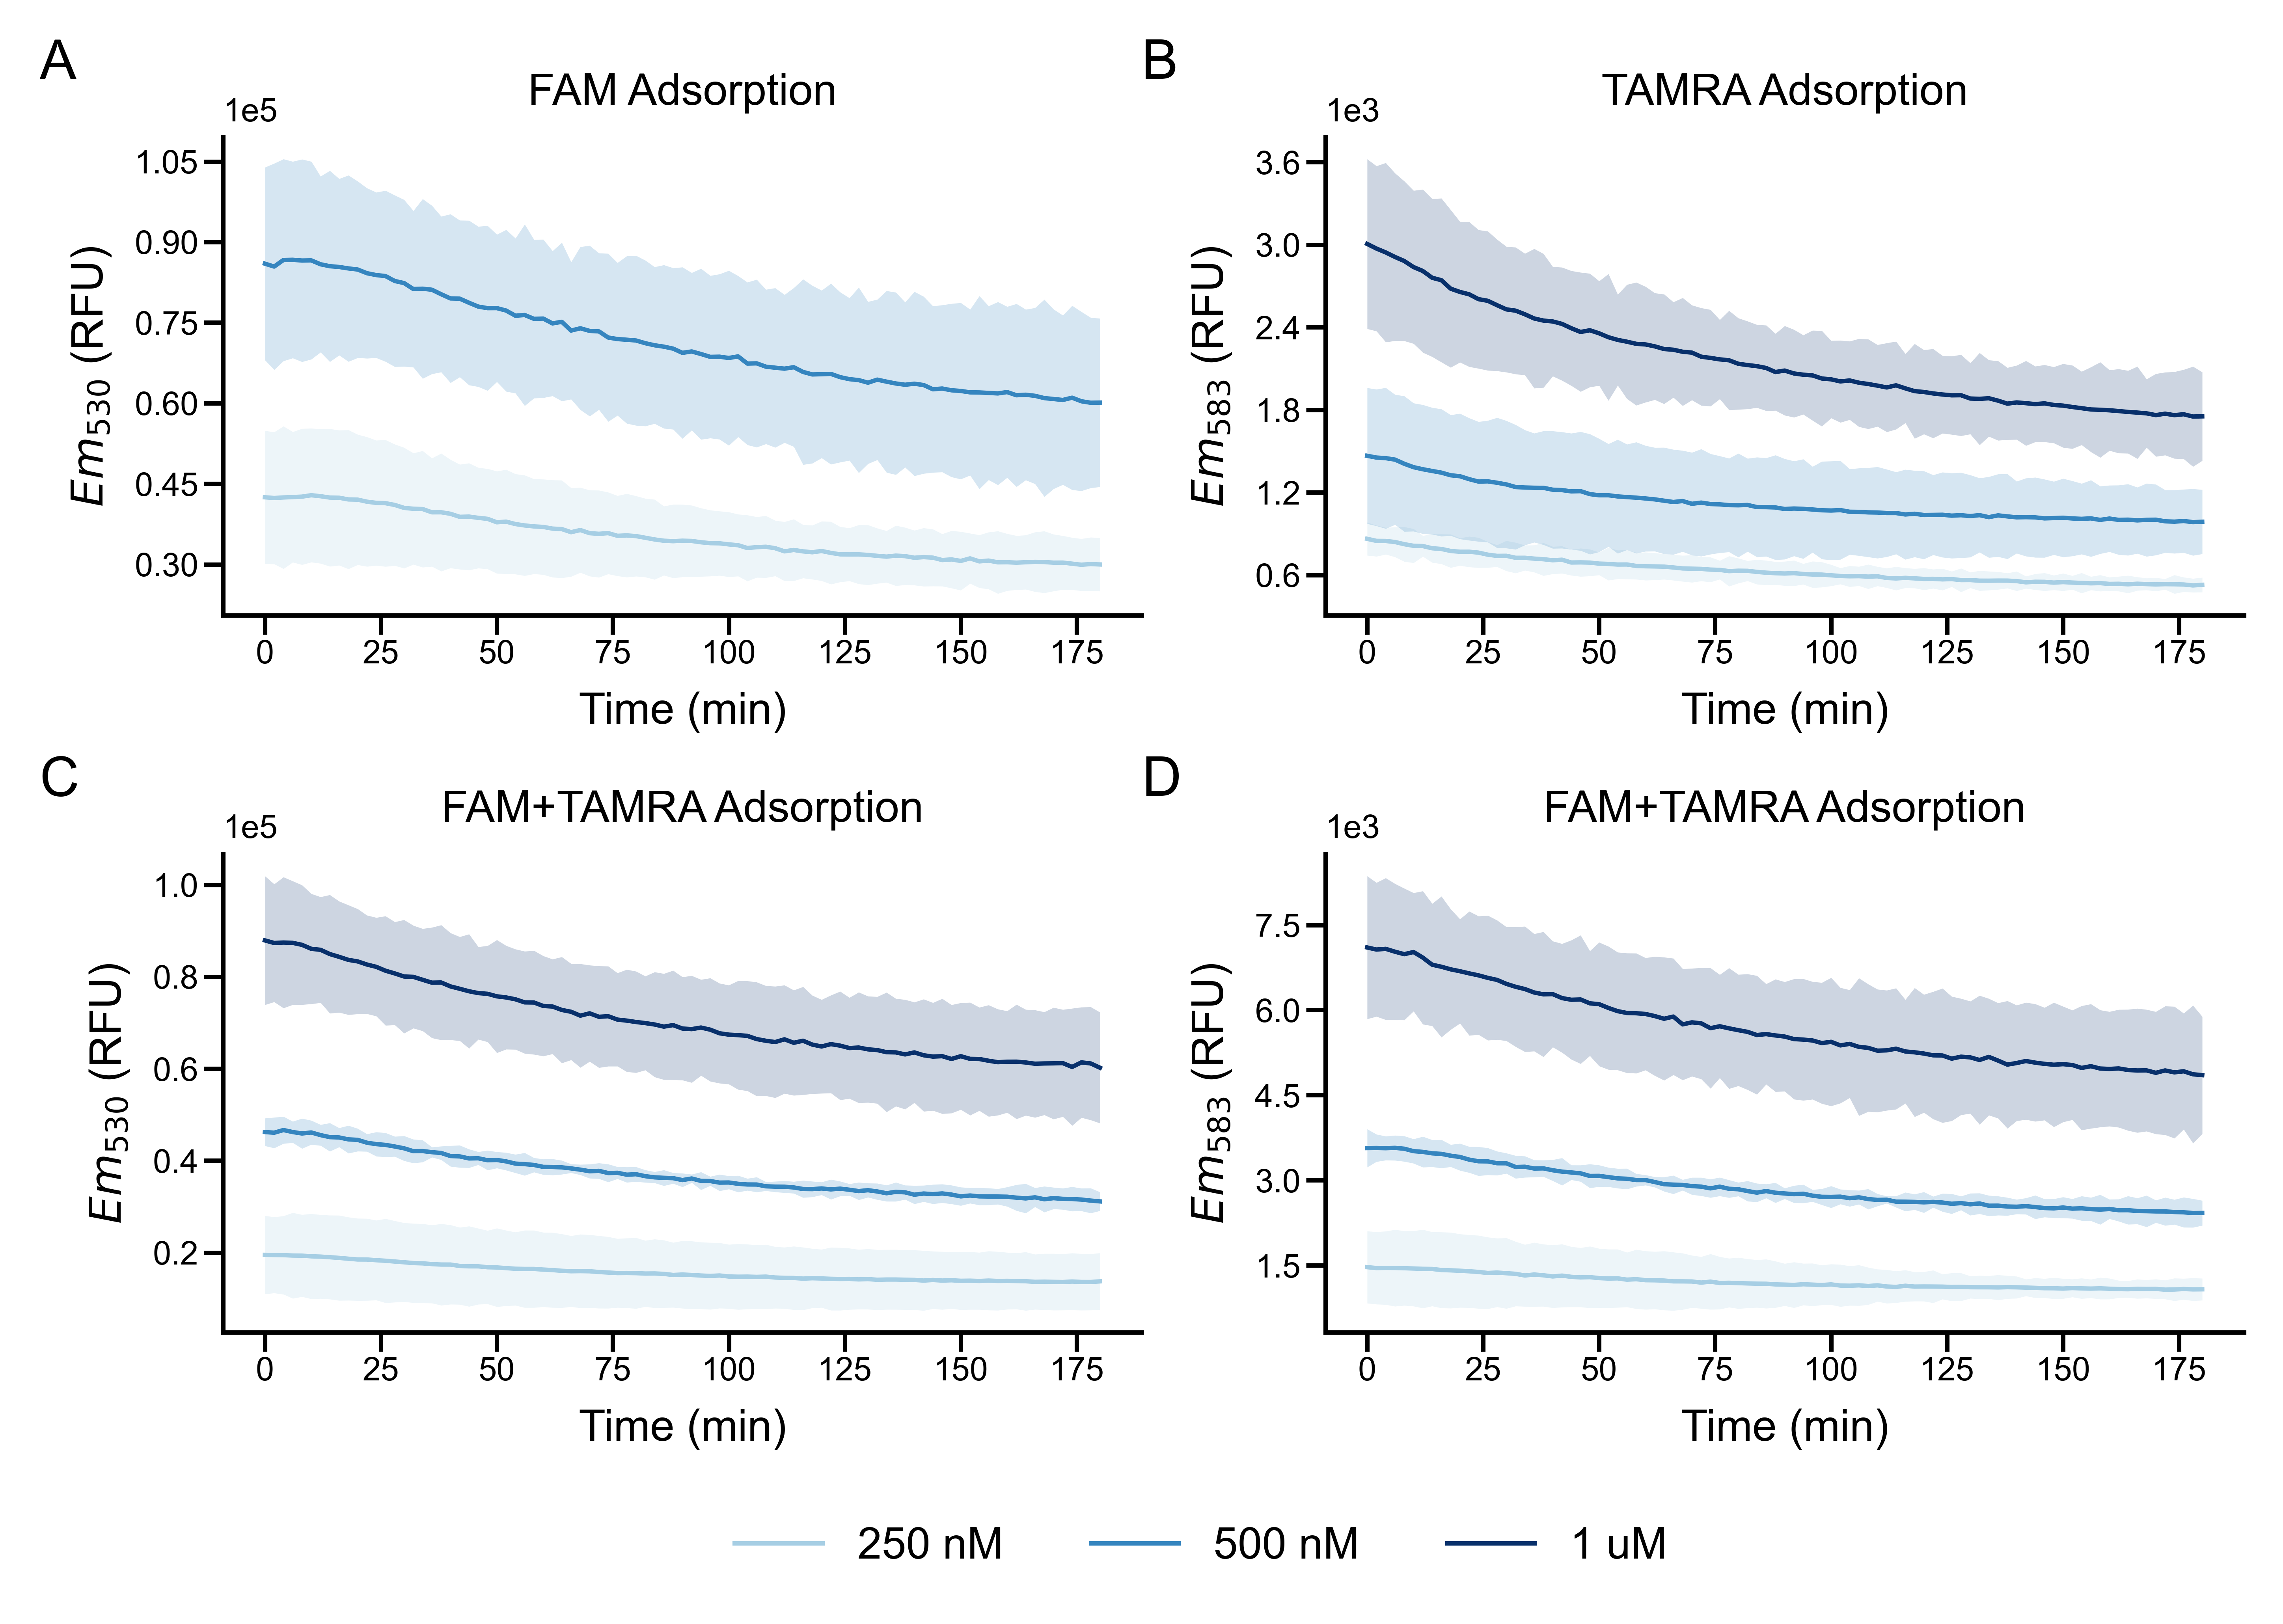

In [3]:
f= '../../data/raw_data/nsa_test.csv'

fam_wells = {
    'nm250' : {'L1', 'M1', 'N1', 'O1', 'P1'},
    'nm500' : {'L2', 'M2', 'N2', 'O2', 'P2'},
    'um1' : {'L3', 'M3', 'N3', 'O3', 'P3'}}
tamra_wells = {
    'nm250' : {'L4', 'M4', 'N4', 'O4', 'P4'},
    'nm500' : {'L5', 'M5', 'N5', 'O5', 'P5'},
    'um1' : {'L6', 'M6', 'N6', 'O6', 'P6'}}
both_wells = {
    'nm250' : {'L7', 'M7', 'N7', 'O7', 'P7'},
    'nm500' : {'L8', 'M8', 'N8', 'O8', 'P8'},
    'um1' : {'L9', 'M9', 'N9', 'O9', 'P9'}}

fam_dat = nk.read_and_process_general_conc_quotient_data(f, fam_wells, na_values=['OVRFLW'])
tamra_dat = nk.read_and_process_general_conc_quotient_data(f,tamra_wells,  na_values=['OVRFLW'])
both_dat = nk.read_and_process_general_conc_quotient_data(f, both_wells, na_values=['OVRFLW'])

x_f = nk.tc(fam_dat.nm250.fam.index)
l_f = [[x_f, fam_dat.nm250.fam.mean(axis=1)], [x_f, fam_dat.nm500.fam.mean(axis=1)], [x_f, fam_dat.um1.fam.mean(axis=1)]]
e_f = [fam_dat.nm250.fam.std(axis=1), fam_dat.nm500.fam.std(axis=1), fam_dat.um1.fam.std(axis=1)]
ap_f = nkp.AxisPackage(l_f, ['250 nM', '500 nM', '1 uM'], e_f, ['Time (min)', '$Em_{530}$ (RFU)'])

x_t = nk.tc(tamra_dat.nm250.tamra.index)
l_t = [[x_t, tamra_dat.nm250.tamra.mean(axis=1)], [x_t, tamra_dat.nm500.tamra.mean(axis=1)], [x_t, tamra_dat.um1.tamra.mean(axis=1)]]
e_t = [tamra_dat.nm250.tamra.std(axis=1), tamra_dat.nm500.tamra.std(axis=1), tamra_dat.um1.tamra.std(axis=1)]
ap_t = nkp.AxisPackage(l_t, ['_250 nM', '_500 nM', '_1 uM'], e_t, ['Time (min)', '$Em_{583}$ (RFU)'])

x_b = nk.tc(both_dat.nm250.fam.index)
l_b = [[x_b, both_dat.nm250.fam.mean(axis=1)], [x_b, both_dat.nm500.fam.mean(axis=1)], [x_b, both_dat.um1.fam.mean(axis=1)]]
e_b = [both_dat.nm250.fam.std(axis=1), both_dat.nm500.fam.std(axis=1), both_dat.um1.fam.std(axis=1)]
ap_b = nkp.AxisPackage(l_b, ['_250 nM', '_500 nM', '_1 uM'], e_b, ['Time (min)', '$Em_{530}$ (RFU)'])

x_b2 = nk.tc(both_dat.nm250.tamra.index)
l_b2 = [[x_b, both_dat.nm250.tamra.mean(axis=1)], [x_b, both_dat.nm500.tamra.mean(axis=1)], [x_b, both_dat.um1.tamra.mean(axis=1)]]
e_b2 = [both_dat.nm250.tamra.std(axis=1), both_dat.nm500.tamra.std(axis=1), both_dat.um1.tamra.std(axis=1)]
ap_b2 = nkp.AxisPackage(l_b2, ['_250 nM', '_500 nM', '_1 uM'], e_b2, ['Time (min)', '$Em_{583}$ (RFU)'])

apa = [[ap_f, ap_t],
       [ap_b, ap_b2]]

fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(16.8*cm, 10*cm), publish_ready=False, dpi=1000)
ax[0][0].set_title('FAM Adsorption', fontsize=8)
ax[0][1].set_title('TAMRA Adsorption', fontsize=8)
ax[1][0].set_title('FAM+TAMRA Adsorption', fontsize=8)
ax[1][1].set_title('FAM+TAMRA Adsorption', fontsize=8)
#ax[0][0].subtitle('FAM Adsorbtion')
fig.subplots_adjust(wspace=.2, hspace=.5)
#fig.legend(['250 nM', '500 nM', '1 uM'], ncols=3, bbox_to_anchor=(0.5, 0.0), loc='lower center', fontsize=8)

ax[0][0].text(-0.2, 1.1, 'A', transform=ax[0][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][1].text(-0.2, 1.1, 'B', transform=ax[0][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][0].text(-.2, 1.1, 'C', transform=ax[1][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][1].text(-0.2, 1.1, 'D', transform=ax[1][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')

fig.savefig('./charts/si/ns_adsorbtion.png', dpi=2000, bbox_inches='tight')

# Clinical POS indi Charts

In [4]:
hpv16_pos_filepath = '../../data/raw_data/03082023_hpv16_pos_clinical.csv'

pos11_wells = {'bhq': ['J1', 'K1', 'L1'], 'tamra': ['G1', 'H1', 'I1']}
pos12_wells = {'bhq': ['J2', 'K2', 'L2'], 'tamra': ['G2', 'H2', 'I2']}
pos14_wells = {'bhq': ['J4', 'K4', 'L4'], 'tamra': ['G4', 'H4', 'I4']}
pos17_wells = {'bhq': ['J7', 'K7', 'L7'], 'tamra': ['G7', 'H7', 'I7']}



pos11_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos11_wells)
pos12_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos12_wells)
pos14_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos14_wells)
pos17_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepath, pos17_wells)

pos13_wellsR = {'bhq': ['D9', 'E9', 'F9'], 'tamra': ['A9', 'B9', 'C9']}
pos15_wellsR = {'bhq': ['D10', 'E10', 'F10'], 'tamra': ['A10', 'B10', 'C10']}
pos16_wellsR = {'bhq': ['D11', 'E11', 'F11'], 'tamra': ['A11', 'B11', 'C11']}
pos18_wellsR = {'bhq': ['D12', 'E12', 'F12'], 'tamra': ['A12', 'B12', 'C12']}

hpv16_pos_filepathR = '../../data/raw_data/05082023_hpv16_pos_clinical_selectredo.csv'

pos13_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos13_wellsR, fam_range=(62, 141), tamra_range=(143, 222))
pos15_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos15_wellsR, fam_range=(62, 141), tamra_range=(143, 222))
pos16_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos16_wellsR, fam_range=(62, 141), tamra_range=(143, 222))
pos18_data = nk.read_and_process_clinical_quotient_data(hpv16_pos_filepathR, pos18_wellsR, fam_range=(62, 141), tamra_range=(143, 222))


hpv16_neg_filepath = '../../data/raw_data/03082023_hpv16_neg_clinical.csv'

neg5_wells = {'bhq': ['D1', 'E1', 'F1'], 'tamra': ['A1', 'B1', 'C1']}
neg6_wells = {'bhq': ['D2', 'E2', 'F2'], 'tamra': ['A2', 'B2', 'C2']}
neg9_wells = {'bhq': ['D3', 'E3', 'F3'], 'tamra': ['A3', 'B3', 'C3']}
neg10_wells = {'bhq': ['D4', 'E4', 'F4'], 'tamra': ['A4', 'B4', 'C4']}
neg13_wells = {'bhq': ['D5', 'E5', 'F5'], 'tamra': ['A5', 'B5', 'C5']}
neg15_wells = {'bhq': ['D6', 'E6', 'F6'], 'tamra': ['A6', 'B6', 'C6']}
neg16_wells = {'bhq': ['D7', 'E7', 'F7'], 'tamra': ['A7', 'B7', 'C7']}
neg19_wells = {'bhq': ['D8', 'E8', 'F8'], 'tamra': ['A8', 'B8', 'C8']}

allneg_wells = {'bhq': ['D1', 'E1', 'F1', 'D2', 'E2', 'F2', 'D3', 'E3', 'F3', 'D4', 'E4', 'F4', 'D5', 'E5', 'F5', 'D6', 'E6', 'F6', 'D7', 'E7', 'F7', 'D8', 'E8', 'F8'],
                'tamra': ['A1', 'B1', 'C1', 'A2', 'B2', 'C2', 'A3', 'B3', 'C3', 'A4', 'B4', 'C4', 'A5', 'B5', 'C5', 'A6', 'B6', 'C6', 'A7', 'B7', 'C7', 'A8', 'B8', 'C8']}

neg5_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg5_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg6_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg6_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg9_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg9_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg10_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg10_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg13_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg13_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg15_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg15_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg16_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg16_wells, fam_range=(62, 141), tamra_range=(146, 225))
neg19_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, neg19_wells, fam_range=(62, 141), tamra_range=(146, 225))

allneg_data = nk.read_and_process_clinical_quotient_data(hpv16_neg_filepath, allneg_wells, fam_range=(62, 141), tamra_range=(146, 225))

allneg_qavg = allneg_data['quotient_stats']['mean']
allneg_qstd = allneg_data['quotient_stats']['stdev']
allneg_bhqavg = allneg_data['fam_bhq_stats']['mean']
allneg_bhqstd = allneg_data['fam_bhq_stats']['stdev']



## Qupotient

sample 11 quotient at row 0 and col 0
sample 12 quotient at row 0 and col 1
sample 13 quotient at row 0 and col 2
sample 14 quotient at row 0 and col 3
sample 15 quotient at row 1 and col 0
sample 16 quotient at row 1 and col 1
sample 17 quotient at row 1 and col 2
sample 18 quotient at row 1 and col 3


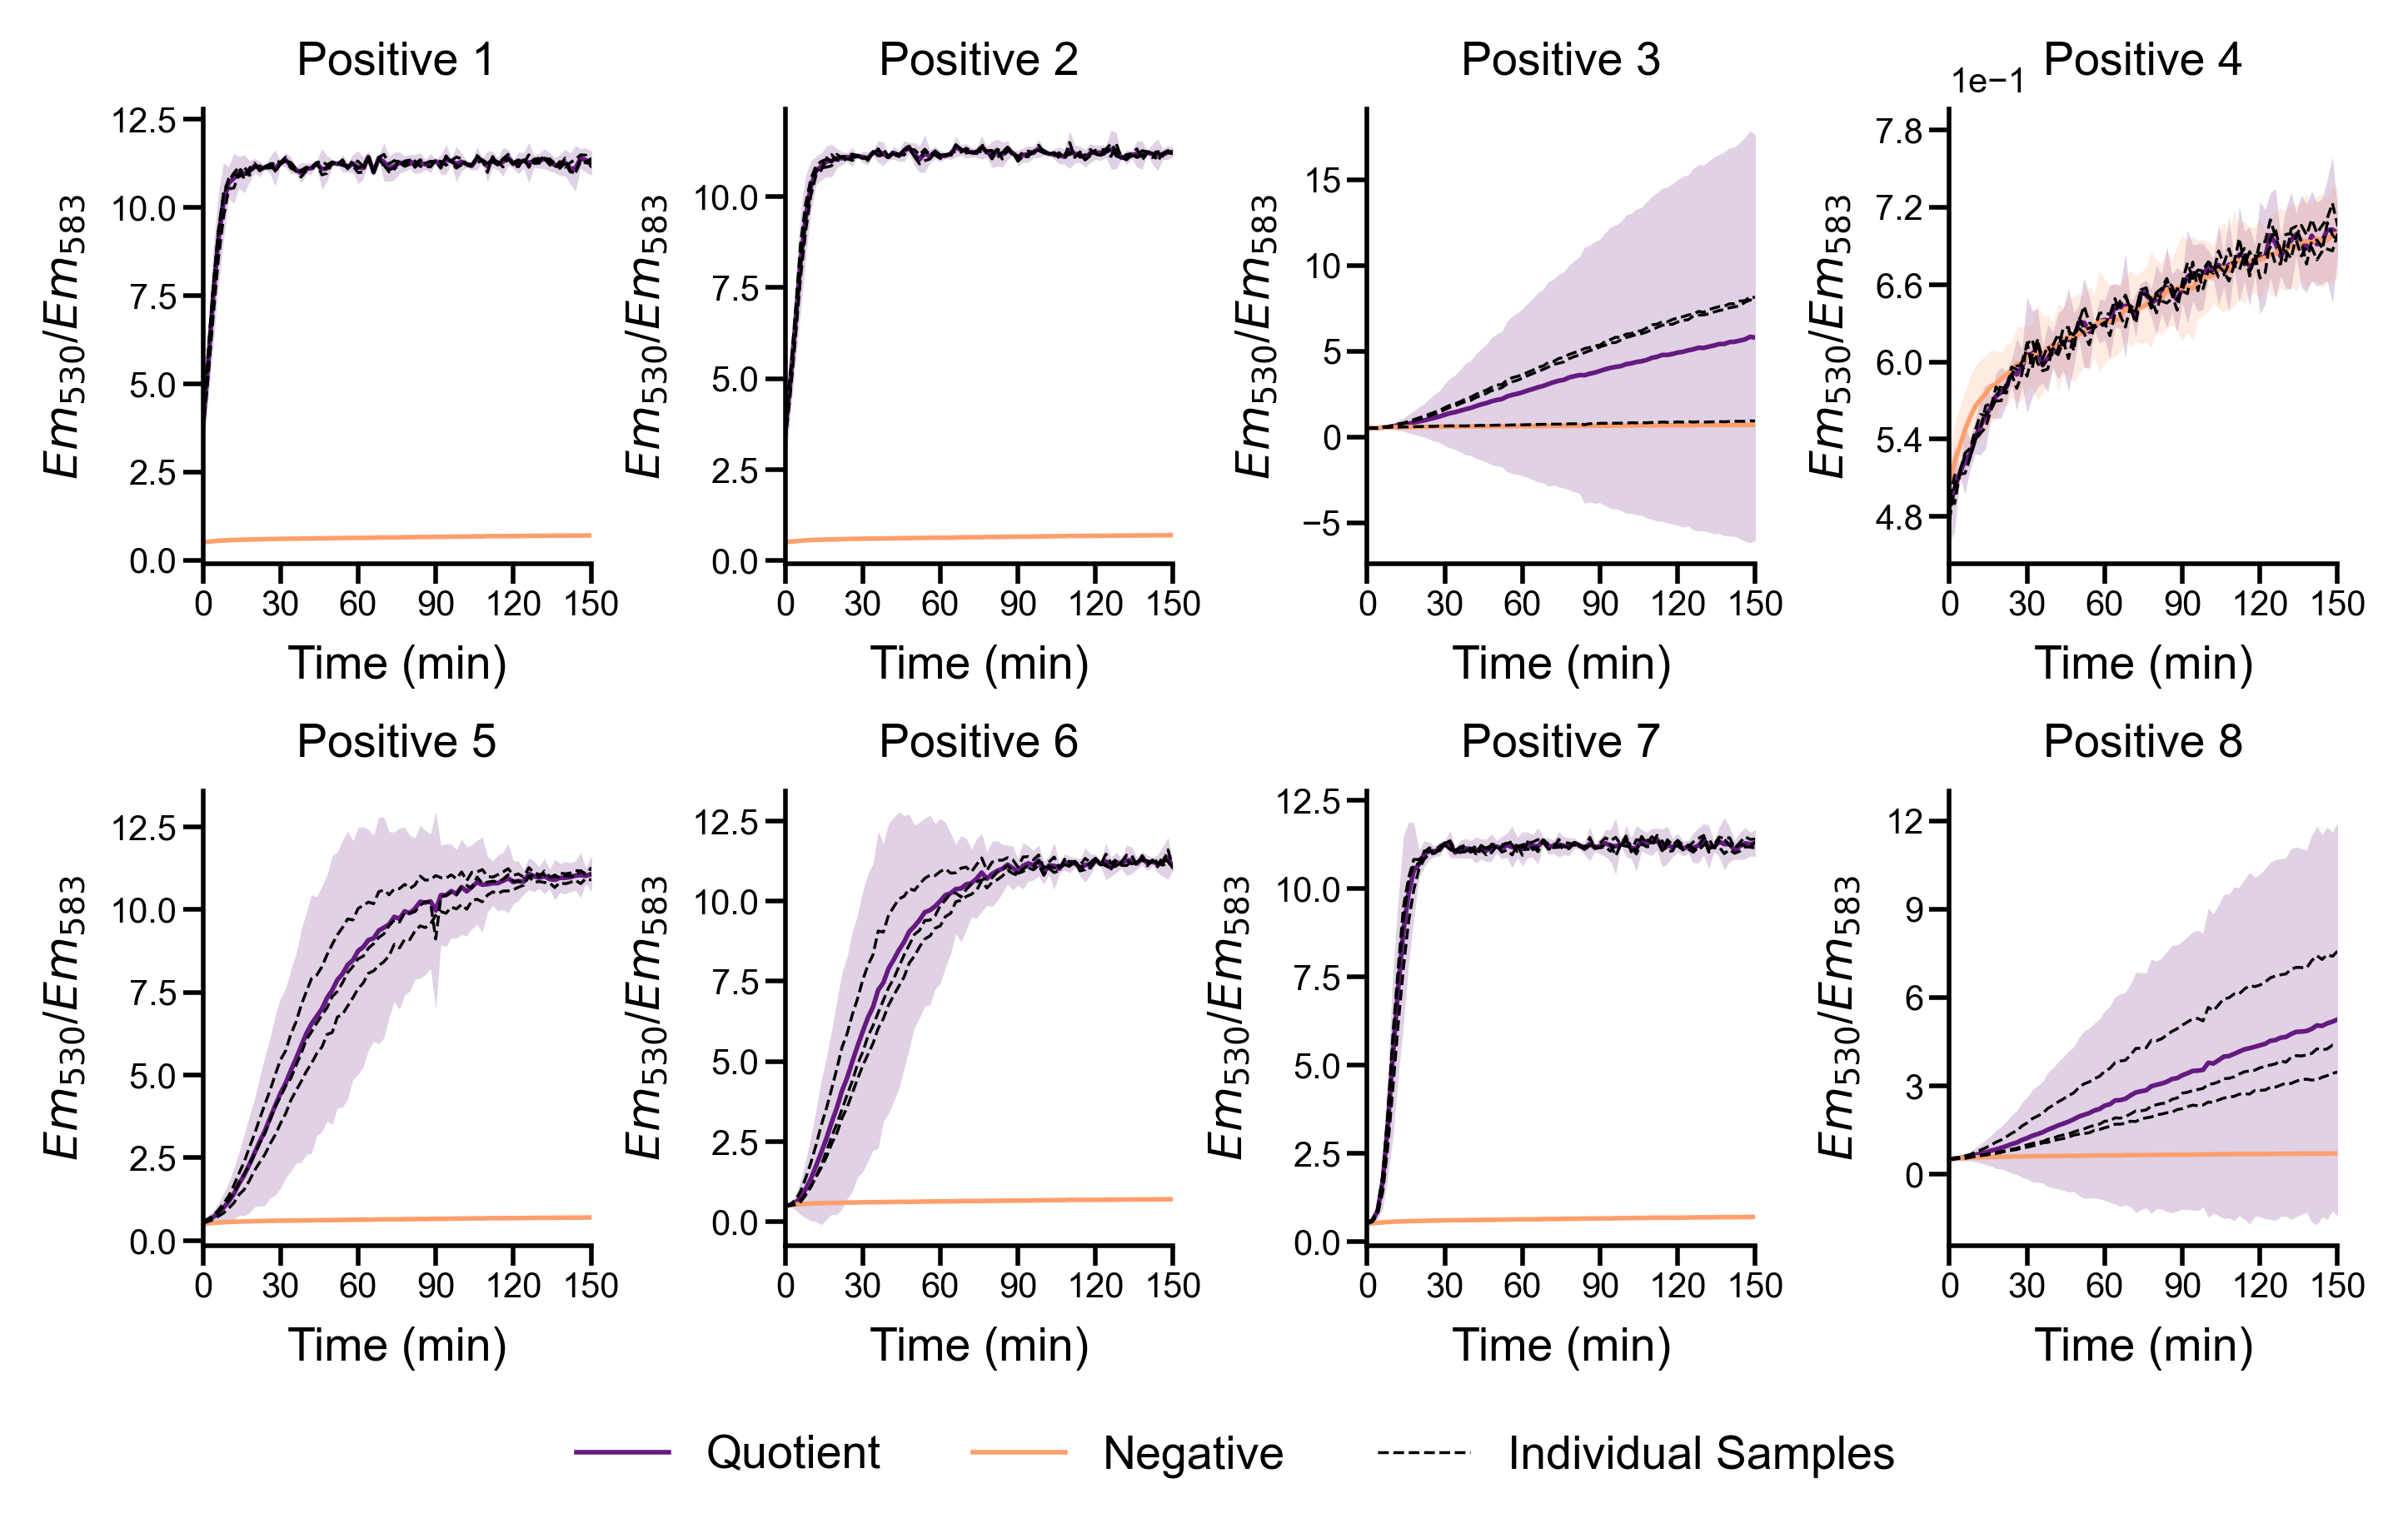

In [5]:


allpos = [pos11_data, pos12_data, pos13_data, pos14_data, pos15_data, pos16_data, pos17_data, pos18_data]
posids = [11, 12, 13, 14, 15, 16, 17, 18]

ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.3, 0.8, 1024))
colormap = mpl.colors.ListedColormap(colors)

apa = [[0,0,0,0],
       [0,0,0,0]]

leg_done = False
for id, data in zip(posids, allpos):
    if not leg_done:
        labels_quot = ['Quotient', 'Negative']
        labels_bhq = ['BHQ', 'Negative']
        leg_done = True
    else:
        labels_quot = ['_Quotient', '_Negative']
        labels_bhq = ['_BHQ', '_Negative']



    xq = nk.tc(data['quotient'].index)
    lq = [[xq, data['quotient_stats']['mean']], [nk.tc(allneg_qavg.index), allneg_qavg]]
    eq = [data['quotient_stats']['stdev'], allneg_qstd]
    apq = nkp.AxisPackage(lq, labels_quot, eq, ['Time (min)', '$Em_{530}$/$Em_{583}$'])

    idx = id - 11
    row = idx // 4
    col = idx % 4
    apa[row][col] = apq

    print(f'sample {id} quotient at row {row} and col {col}')

fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(16.8*cm, 9*cm), publish_ready=False, dpi=500, colormap=colormap, legend=False)
fig.subplots_adjust(wspace=.5, hspace=.5)

blkleg = False 
for id, data in zip(posids, allpos):
    idx = id - 11
    row = idx // 4
    col = idx % 4

    a = ax[row][col]
    a.set_title(f'Positive {id-10}', fontsize=8)
    for i in [0,1,2]:
        fcol = data['quotient'].columns[i]

        tamdat = data['quotient'][fcol]
        x_tamra =nk.tc(data['quotient'].index)
        lbl = 'Individual Samples' if not blkleg else '_Individual Samples'
        blkleg = True

        a.plot(x_tamra, tamdat, 'k--', linewidth=0.5, label=lbl)
        a.set_xlim(0, 150)
        a.set_xticks([0, 30, 60, 90, 120, 150])

#fig.get_legend().remove()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.01),
    fancybox=True, shadow=True, ncol=4, fontsize=8, frameon=False)

"""ax[0][0].text(-0.2, 1.1, 'A', transform=ax[0][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][1].text(-0.2, 1.1, 'B', transform=ax[0][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][2].text(-.2, 1.1, 'C', transform=ax[0][2].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][3].text(-0.2, 1.1, 'D', transform=ax[0][3].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][0].text(-0.2, 1.1, 'E', transform=ax[1][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][1].text(-0.2, 1.1, 'F', transform=ax[1][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][2].text(-0.2, 1.1, 'G', transform=ax[1][2].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][3].text(-0.2, 1.1, 'H', transform=ax[1][3].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')"""



plt.savefig('./charts/si/posclincial_quotient.png', dpi=2000, bbox_inches='tight')

## BHQ 

sample 11 quotient at row 0 and col 0
sample 12 quotient at row 0 and col 1
sample 13 quotient at row 0 and col 2
sample 14 quotient at row 0 and col 3
sample 15 quotient at row 1 and col 0
sample 16 quotient at row 1 and col 1
sample 17 quotient at row 1 and col 2
sample 18 quotient at row 1 and col 3


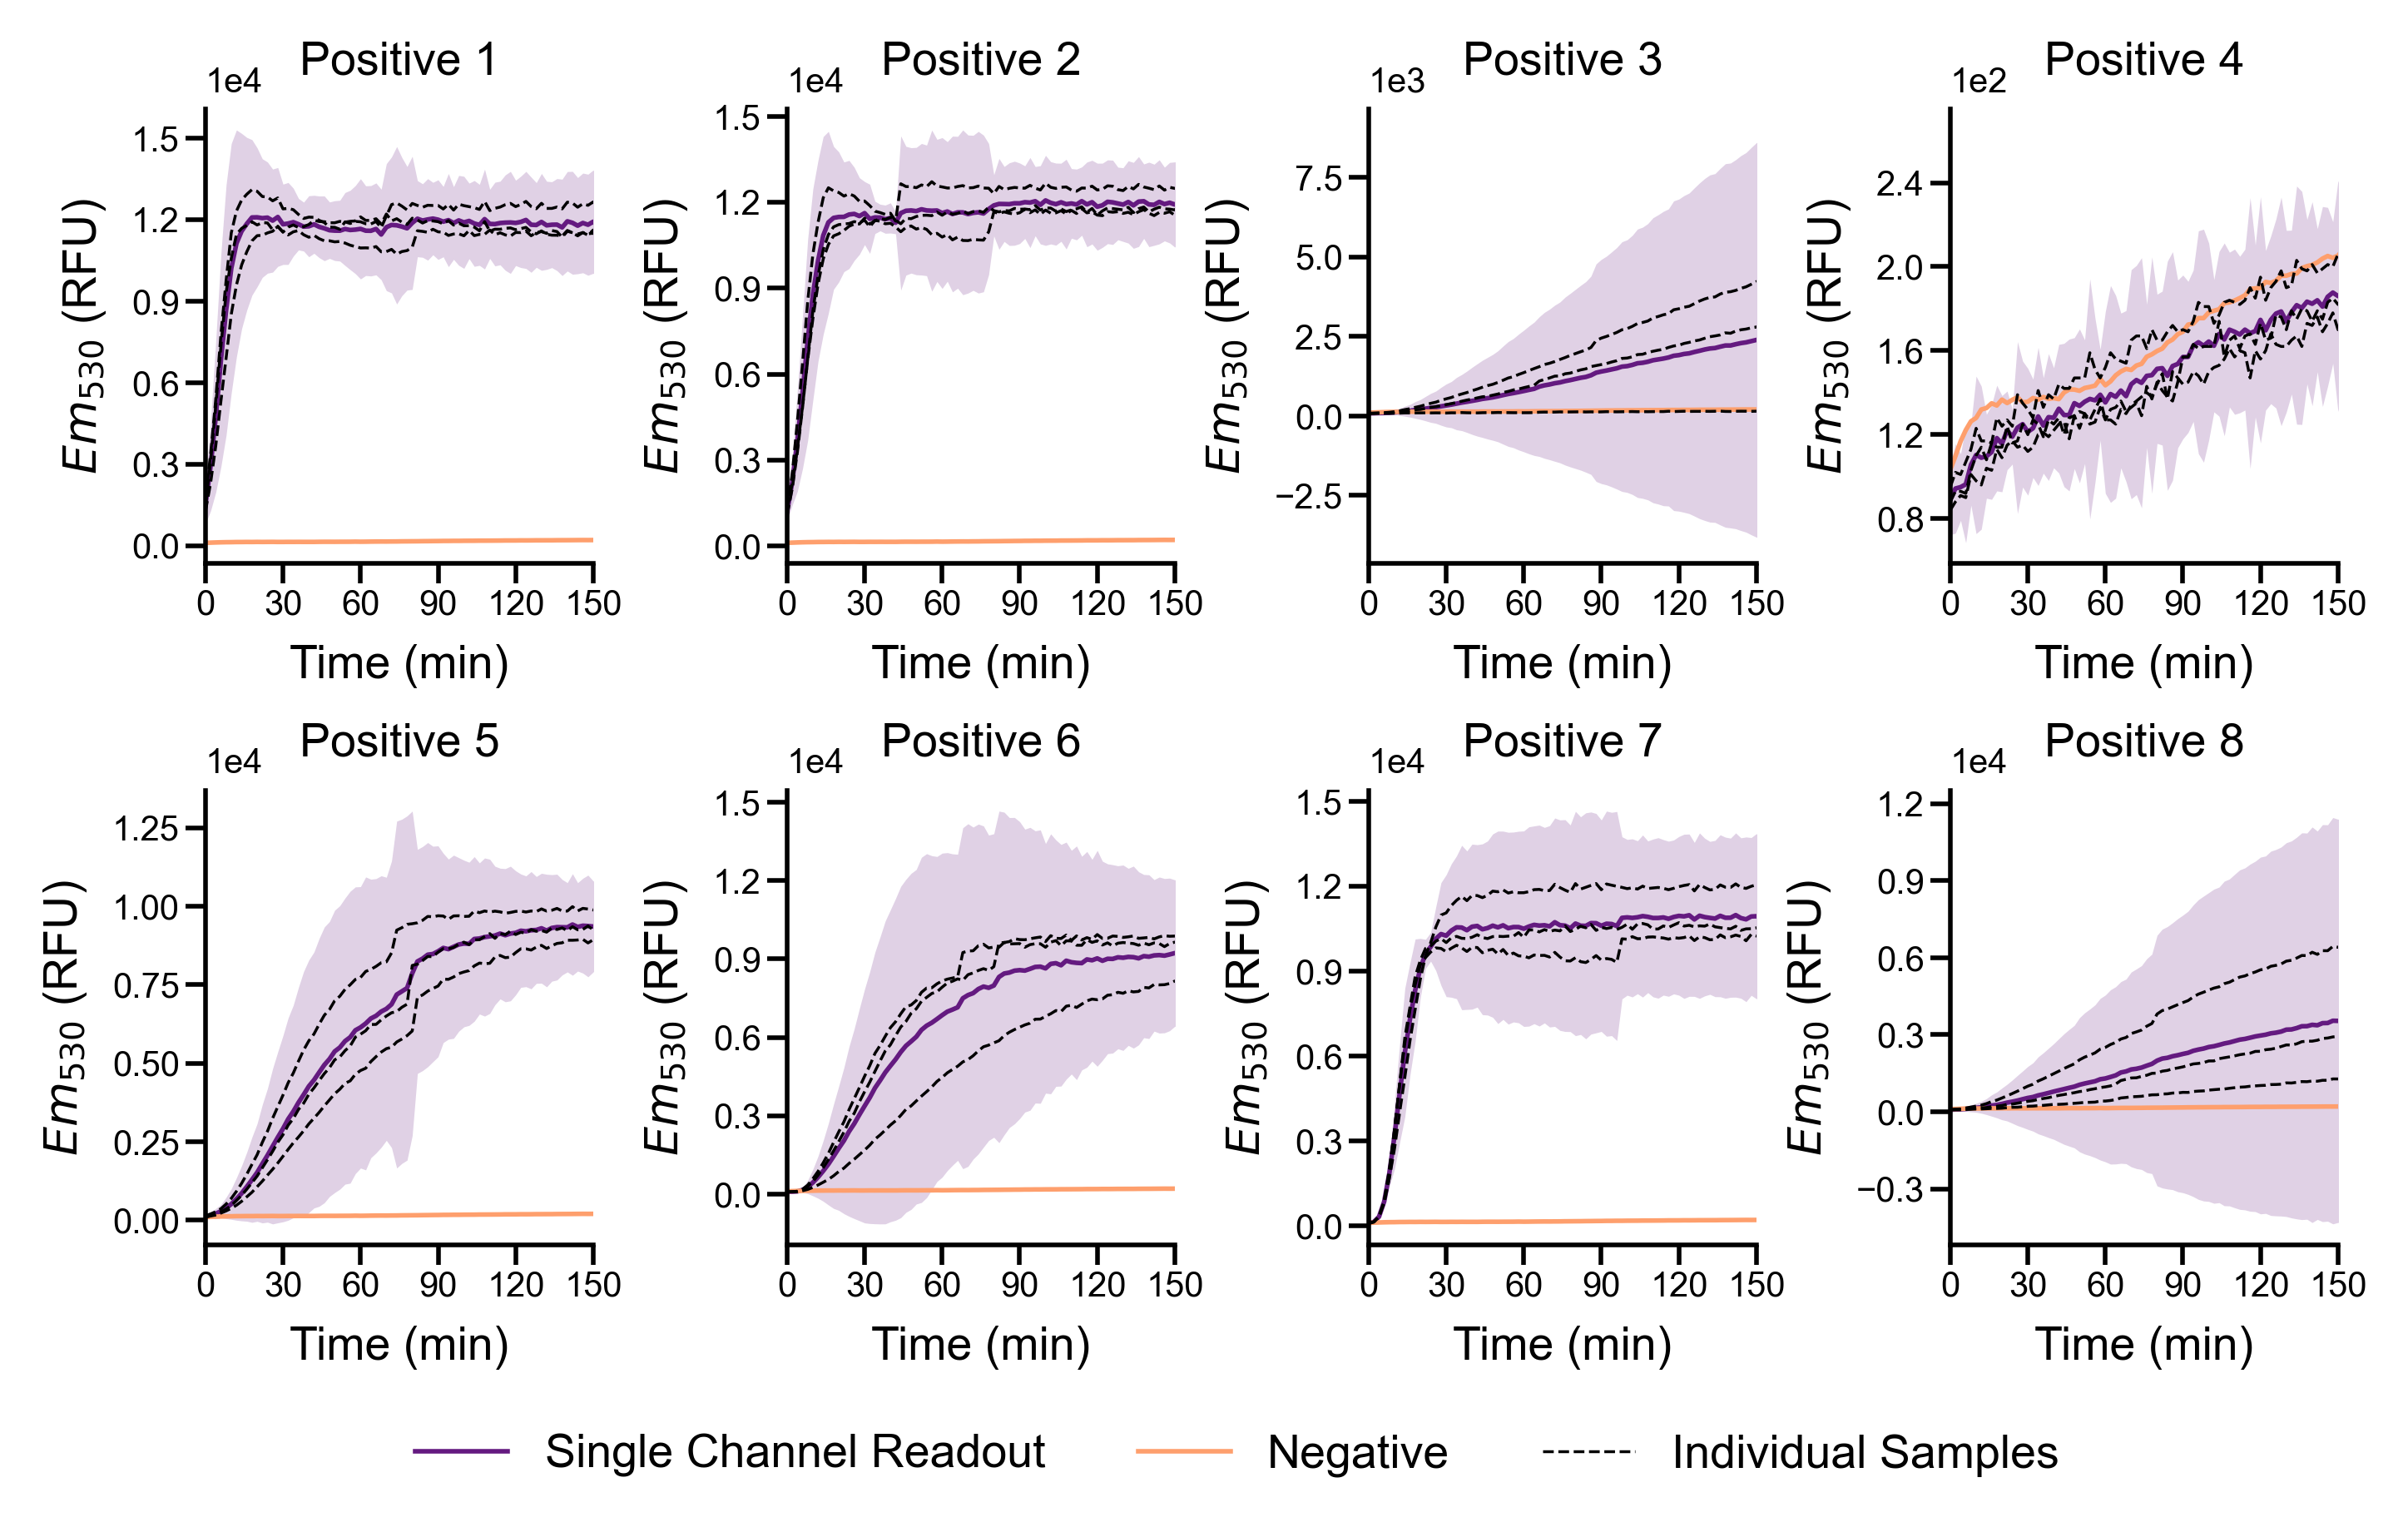

In [6]:


allpos = [pos11_data, pos12_data, pos13_data, pos14_data, pos15_data, pos16_data, pos17_data, pos18_data]
posids = [11, 12, 13, 14, 15, 16, 17, 18]

ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.3, 0.8, 1024))
colormap = mpl.colors.ListedColormap(colors)

apa = [[0,0,0,0],
       [0,0,0,0]]

leg_done = False
for id, data in zip(posids, allpos):
    if not leg_done:
        labels_quot = ['Quotient', 'Negative']
        labels_bhq = ['Single Channel Readout', 'Negative']
        leg_done = True
    else:
        labels_quot = ['_Quotient', '_Negative']
        labels_bhq = ['_BHQ', '_Negative']



    x = nk.tc(data['fam_bhq_data'].index)
    l = [[x, data['fam_bhq_stats']['mean']], [nk.tc(allneg_bhqavg.index), allneg_bhqavg]]
    e = [data['fam_bhq_stats']['stdev'], allneg_qstd]
    ap = nkp.AxisPackage(l, labels_bhq, e, ['Time (min)', '$Em_{530}$ (RFU)'])

    idx = id - 11
    row = idx // 4
    col = idx % 4
    apa[row][col] = ap

    print(f'sample {id} quotient at row {row} and col {col}')

fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(16.8*cm, 9*cm), publish_ready=False, dpi=500, colormap=colormap, legend=False)
fig.subplots_adjust(wspace=.5, hspace=.5)

blkleg = False 
for id, data in zip(posids, allpos):
    idx = id - 11
    row = idx // 4
    col = idx % 4

    a = ax[row][col]
    a.set_title(f'Positive {id-10}', fontsize=8)
    for i in [0,1,2]:
        fcol = data['fam_bhq_data'].columns[i]

        tamdat = data['fam_bhq_data'][fcol]
        x_tamra =nk.tc(data['fam_bhq_data'].index)
        lbl = 'Individual Samples' if not blkleg else '_Individual Samples'
        blkleg = True

        a.plot(x_tamra, tamdat, 'k--', linewidth=0.5, label=lbl)
        a.set_xlim(0, 150)
        a.set_xticks([0, 30, 60, 90, 120, 150])

#fig.get_legend().remove()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.01),
    fancybox=True, shadow=True, ncol=4, fontsize=8, frameon=False)

"""ax[0][0].text(-0.2, 1.1, 'A', transform=ax[0][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][1].text(-0.2, 1.1, 'B', transform=ax[0][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][2].text(-.2, 1.1, 'C', transform=ax[0][2].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][3].text(-0.2, 1.1, 'D', transform=ax[0][3].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][0].text(-0.2, 1.1, 'E', transform=ax[1][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][1].text(-0.2, 1.1, 'F', transform=ax[1][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][2].text(-0.2, 1.1, 'G', transform=ax[1][2].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[1][3].text(-0.2, 1.1, 'H', transform=ax[1][3].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')"""



plt.savefig('./charts/si/posclincial_bhq.png', dpi=2000, bbox_inches='tight')

# Kinetics

In [7]:
wells = {
    'bhq_0nm': ['H16', 'H17', 'H18'],
    'bhq_1nm': ['G16', 'G17', 'G18'],
    'bhq_10nm': ['F16', 'F17', 'F18'],
    'bhq_100nm': ['E16', 'E17', 'E18'],
    'bhq_200nm': ['D16', 'D17', 'D18'],
    'bhq_500nm': ['C16', 'C17', 'C18'],
    'bhq_1000nm': ['B16', 'B17', 'B18'],
    'bhq_2000nm': ['A16', 'A17', 'A18'],
    'tamra_0nm': ['H13', 'H14', 'H15'],
    'tamra_1nm': ['G13', 'G14', 'G15'],
    'tamra_10nm': ['F13', 'F14', 'F15'],
    'tamra_100nm': ['E13', 'E14', 'E15'],
    'tamra_200nm': ['D13', 'D14', 'D15'],
    'tamra_500nm': ['C13', 'C14', 'C15'],
    'tamra_1000nm': ['B13', 'B14', 'B15'],
    'tamra_2000nm': ['A13', 'A14', 'A15']
}

filename = '../../data/raw_data/11082023_kineticstudy.csv'
all_data = nk.read_and_process_general_conc_quotient_data(filename, wells, fam_range=(62,119), tamra_range=(123,180))

# set teh data up
raw_data =DotMap({
    'bhq_0nm': all_data.bhq_0nm.fam,
    'bhq_1nm': all_data.bhq_1nm.fam,
    'bhq_10nm': all_data.bhq_10nm.fam,
    'bhq_100nm': all_data.bhq_100nm.fam,
    'bhq_200nm': all_data.bhq_200nm.fam,
    'bhq_500nm': all_data.bhq_500nm.fam,
    'bhq_1000nm': all_data.bhq_1000nm.fam,
    'bhq_2000nm': all_data.bhq_2000nm.fam,
    'tamra_0nm': all_data.tamra_0nm.fam,
    'tamra_1nm': all_data.tamra_1nm.fam,
    'tamra_10nm': all_data.tamra_10nm.fam,
    'tamra_100nm': all_data.tamra_100nm.fam,
    'tamra_200nm': all_data.tamra_200nm.fam,
    'tamra_500nm': all_data.tamra_500nm.fam,
    'tamra_1000nm': all_data.tamra_1000nm.fam,
    'tamra_2000nm': all_data.tamra_2000nm.fam
    })

/Users/nathankosla/code_and_projects/FRET_Reporter/code/final_charts/nktools.py:80: RuntimeWarning: invalid value encountered in scalar divide
  t1 = (stdevs1[k] / means1[k])**2
/Users/nathankosla/code_and_projects/FRET_Reporter/code/final_charts/nktools.py:82: RuntimeWarning: invalid value encountered in scalar divide
  t3 = -2 * cov / (means1[k] * means2[k])
/Users/nathankosla/code_and_projects/FRET_Reporter/code/final_charts/nktools.py:79: RuntimeWarning: divide by zero encountered in scalar divide
  f = means1[k] / means2[k]
/Users/nathankosla/code_and_projects/FRET_Reporter/code/final_charts/nktools.py:81: RuntimeWarning: invalid value encountered in scalar divide
  t2 = (stdevs2[k] / means2[k])**2
/Users/nathankosla/code_and_projects/FRET_Reporter/code/final_charts/nktools.py:82: RuntimeWarning: invalid value encountered in scalar divide
  t3 = -2 * cov / (means1[k] * means2[k])
/Users/nathankosla/code_and_projects/FRET_Reporter/code/final_charts/nktools.py:79: RuntimeWarning: di

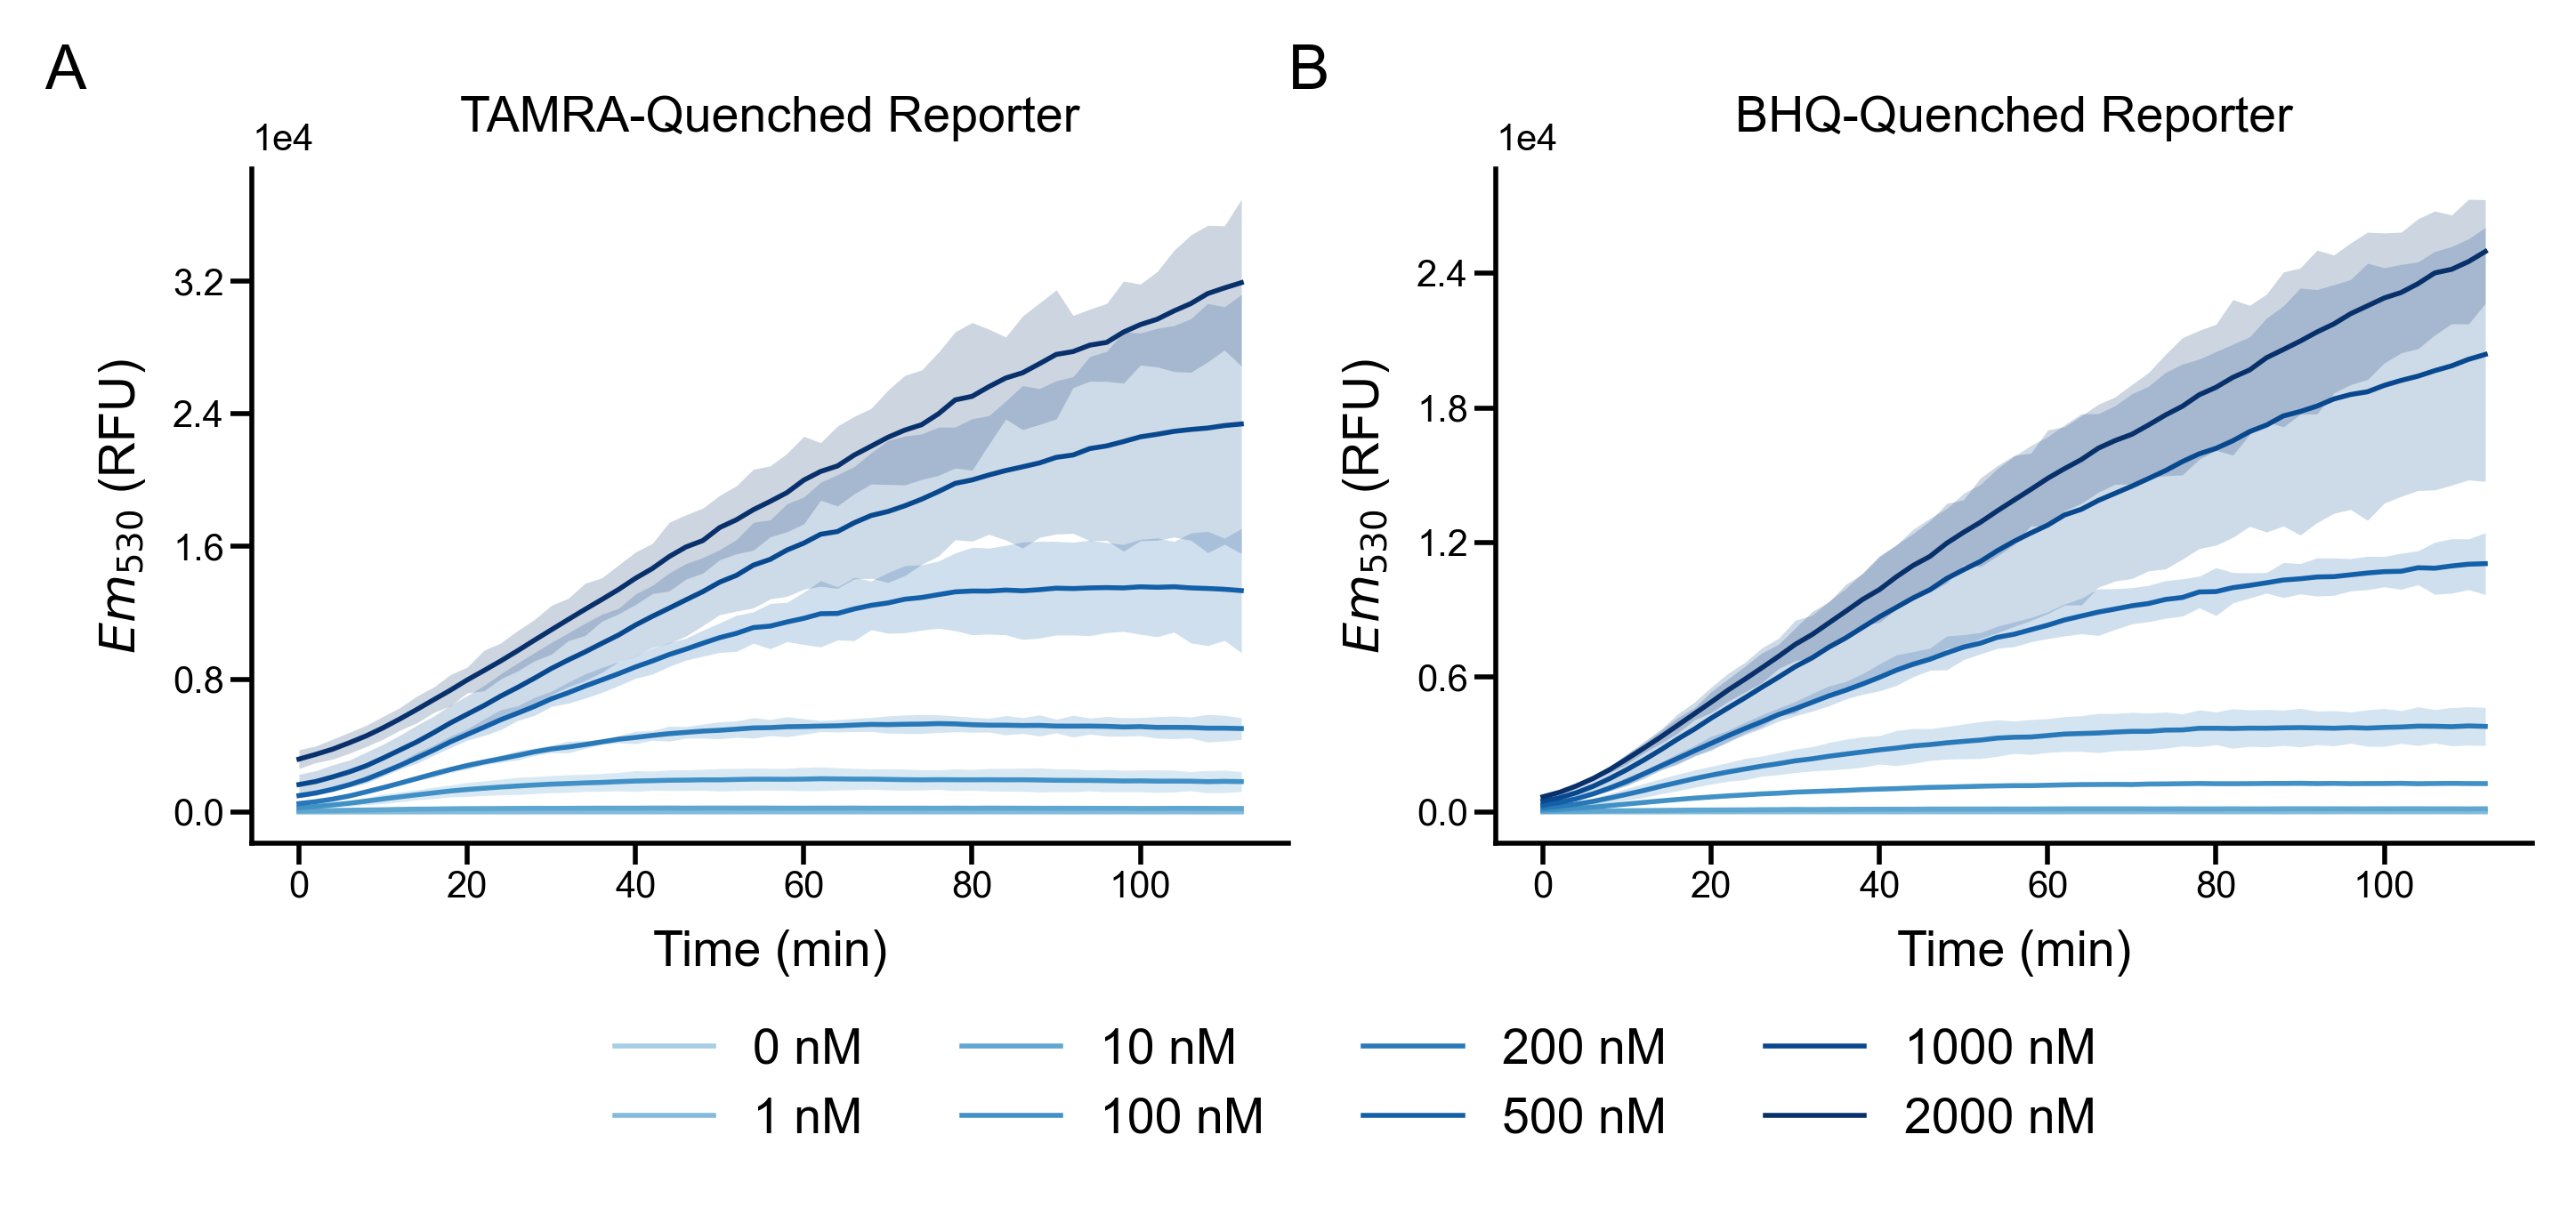

In [8]:
xt = nk.tc(raw_data.tamra_0nm.index)
lt = [[xt, raw_data.tamra_0nm.mean(axis=1)], [xt, raw_data.tamra_1nm.mean(axis=1)], [xt, raw_data.tamra_10nm.mean(axis=1)],
            [xt, raw_data.tamra_100nm.mean(axis=1)], [xt, raw_data.tamra_200nm.mean(axis=1)], [xt, raw_data.tamra_500nm.mean(axis=1)],
            [xt, raw_data.tamra_1000nm.mean(axis=1)], [xt, raw_data.tamra_2000nm.mean(axis=1)]]
et = [raw_data.tamra_0nm.std(axis=1), raw_data.tamra_1nm.std(axis=1), raw_data.tamra_10nm.std(axis=1),
            raw_data.tamra_100nm.std(axis=1), raw_data.tamra_200nm.std(axis=1), raw_data.tamra_500nm.std(axis=1),
            raw_data.tamra_1000nm.std(axis=1), raw_data.tamra_2000nm.std(axis=1)]
apt = nkp.AxisPackage(lt, ['0 nM', '1 nM', '10 nM', '100 nM', '200 nM', '500 nM', '1000 nM', '2000 nM'], et, ['Time (min)', '$Em_{530}$ (RFU)'])

xb = nk.tc(raw_data.bhq_0nm.index)
lb = [[xb, raw_data.bhq_0nm.mean(axis=1)], [xb, raw_data.bhq_1nm.mean(axis=1)], [xb, raw_data.bhq_10nm.mean(axis=1)],
            [xb, raw_data.bhq_100nm.mean(axis=1)], [xb, raw_data.bhq_200nm.mean(axis=1)], [xb, raw_data.bhq_500nm.mean(axis=1)],
            [xb, raw_data.bhq_1000nm.mean(axis=1)], [xb, raw_data.bhq_2000nm.mean(axis=1)]]
eb = [raw_data.bhq_0nm.std(axis=1), raw_data.bhq_1nm.std(axis=1), raw_data.bhq_10nm.std(axis=1),
            raw_data.bhq_100nm.std(axis=1), raw_data.bhq_200nm.std(axis=1), raw_data.bhq_500nm.std(axis=1),
            raw_data.bhq_1000nm.std(axis=1), raw_data.bhq_2000nm.std(axis=1)]
apb = nkp.AxisPackage(lb, ['_0 nM', '_1 nM', '_10 nM', '_100 nM', '_200 nM', '_500 nM', '_1000 nM', '_2000 nM'], eb, ['Time (min)', '$Em_{530}$ (RFU)'])

apa = [[apt, apb]]


fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(16.8*cm, 5*cm), publish_ready=False, dpi=500, legend=False)

ax[0][0].set_title('TAMRA-Quenched Reporter', fontsize=8)
ax[0][1].set_title('BHQ-Quenched Reporter', fontsize=8)

ax[0][0].text(-0.2, 1.1, 'A', transform=ax[0][0].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')
ax[0][1].text(-0.2, 1.1, 'B', transform=ax[0][1].transAxes,
            fontsize='medium', va='bottom', fontfamily='arial')

fig.subplots_adjust(wspace=.2, hspace=.5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
    fancybox=True, shadow=True, ncol=4, fontsize=8, frameon=False)

fig.savefig('./charts/si/kineticstudy.png', dpi=2000, bbox_inches='tight')



# Statistics

2 91 91 91 91
2 91 91
2 91 91 91 91
2 91 91
2 91 91 91 91
2 91 91
2 91 91 91 91
2 91 91
2 91 91 91 91
2 91 91
2 91 91 91 91
2 91 91
2 91 91 91 91
2 91 91
2 91 91 91 91
2 91 91


"sx, sy = axs2.shape\nfor row in range(sx):\n    for col in range(sy):\n        a = axs2[row, col]\n        a.hlines(0.05, 0, a.get_xlim()[1], color='red')\n        a.set_ylabel('Fluorescence Intensity (AFU)', fontsize=14)\n        a.title.set_size(18)\n        axs2[row,col].set_xlabel('Time (s)', fontsize=14)\n"

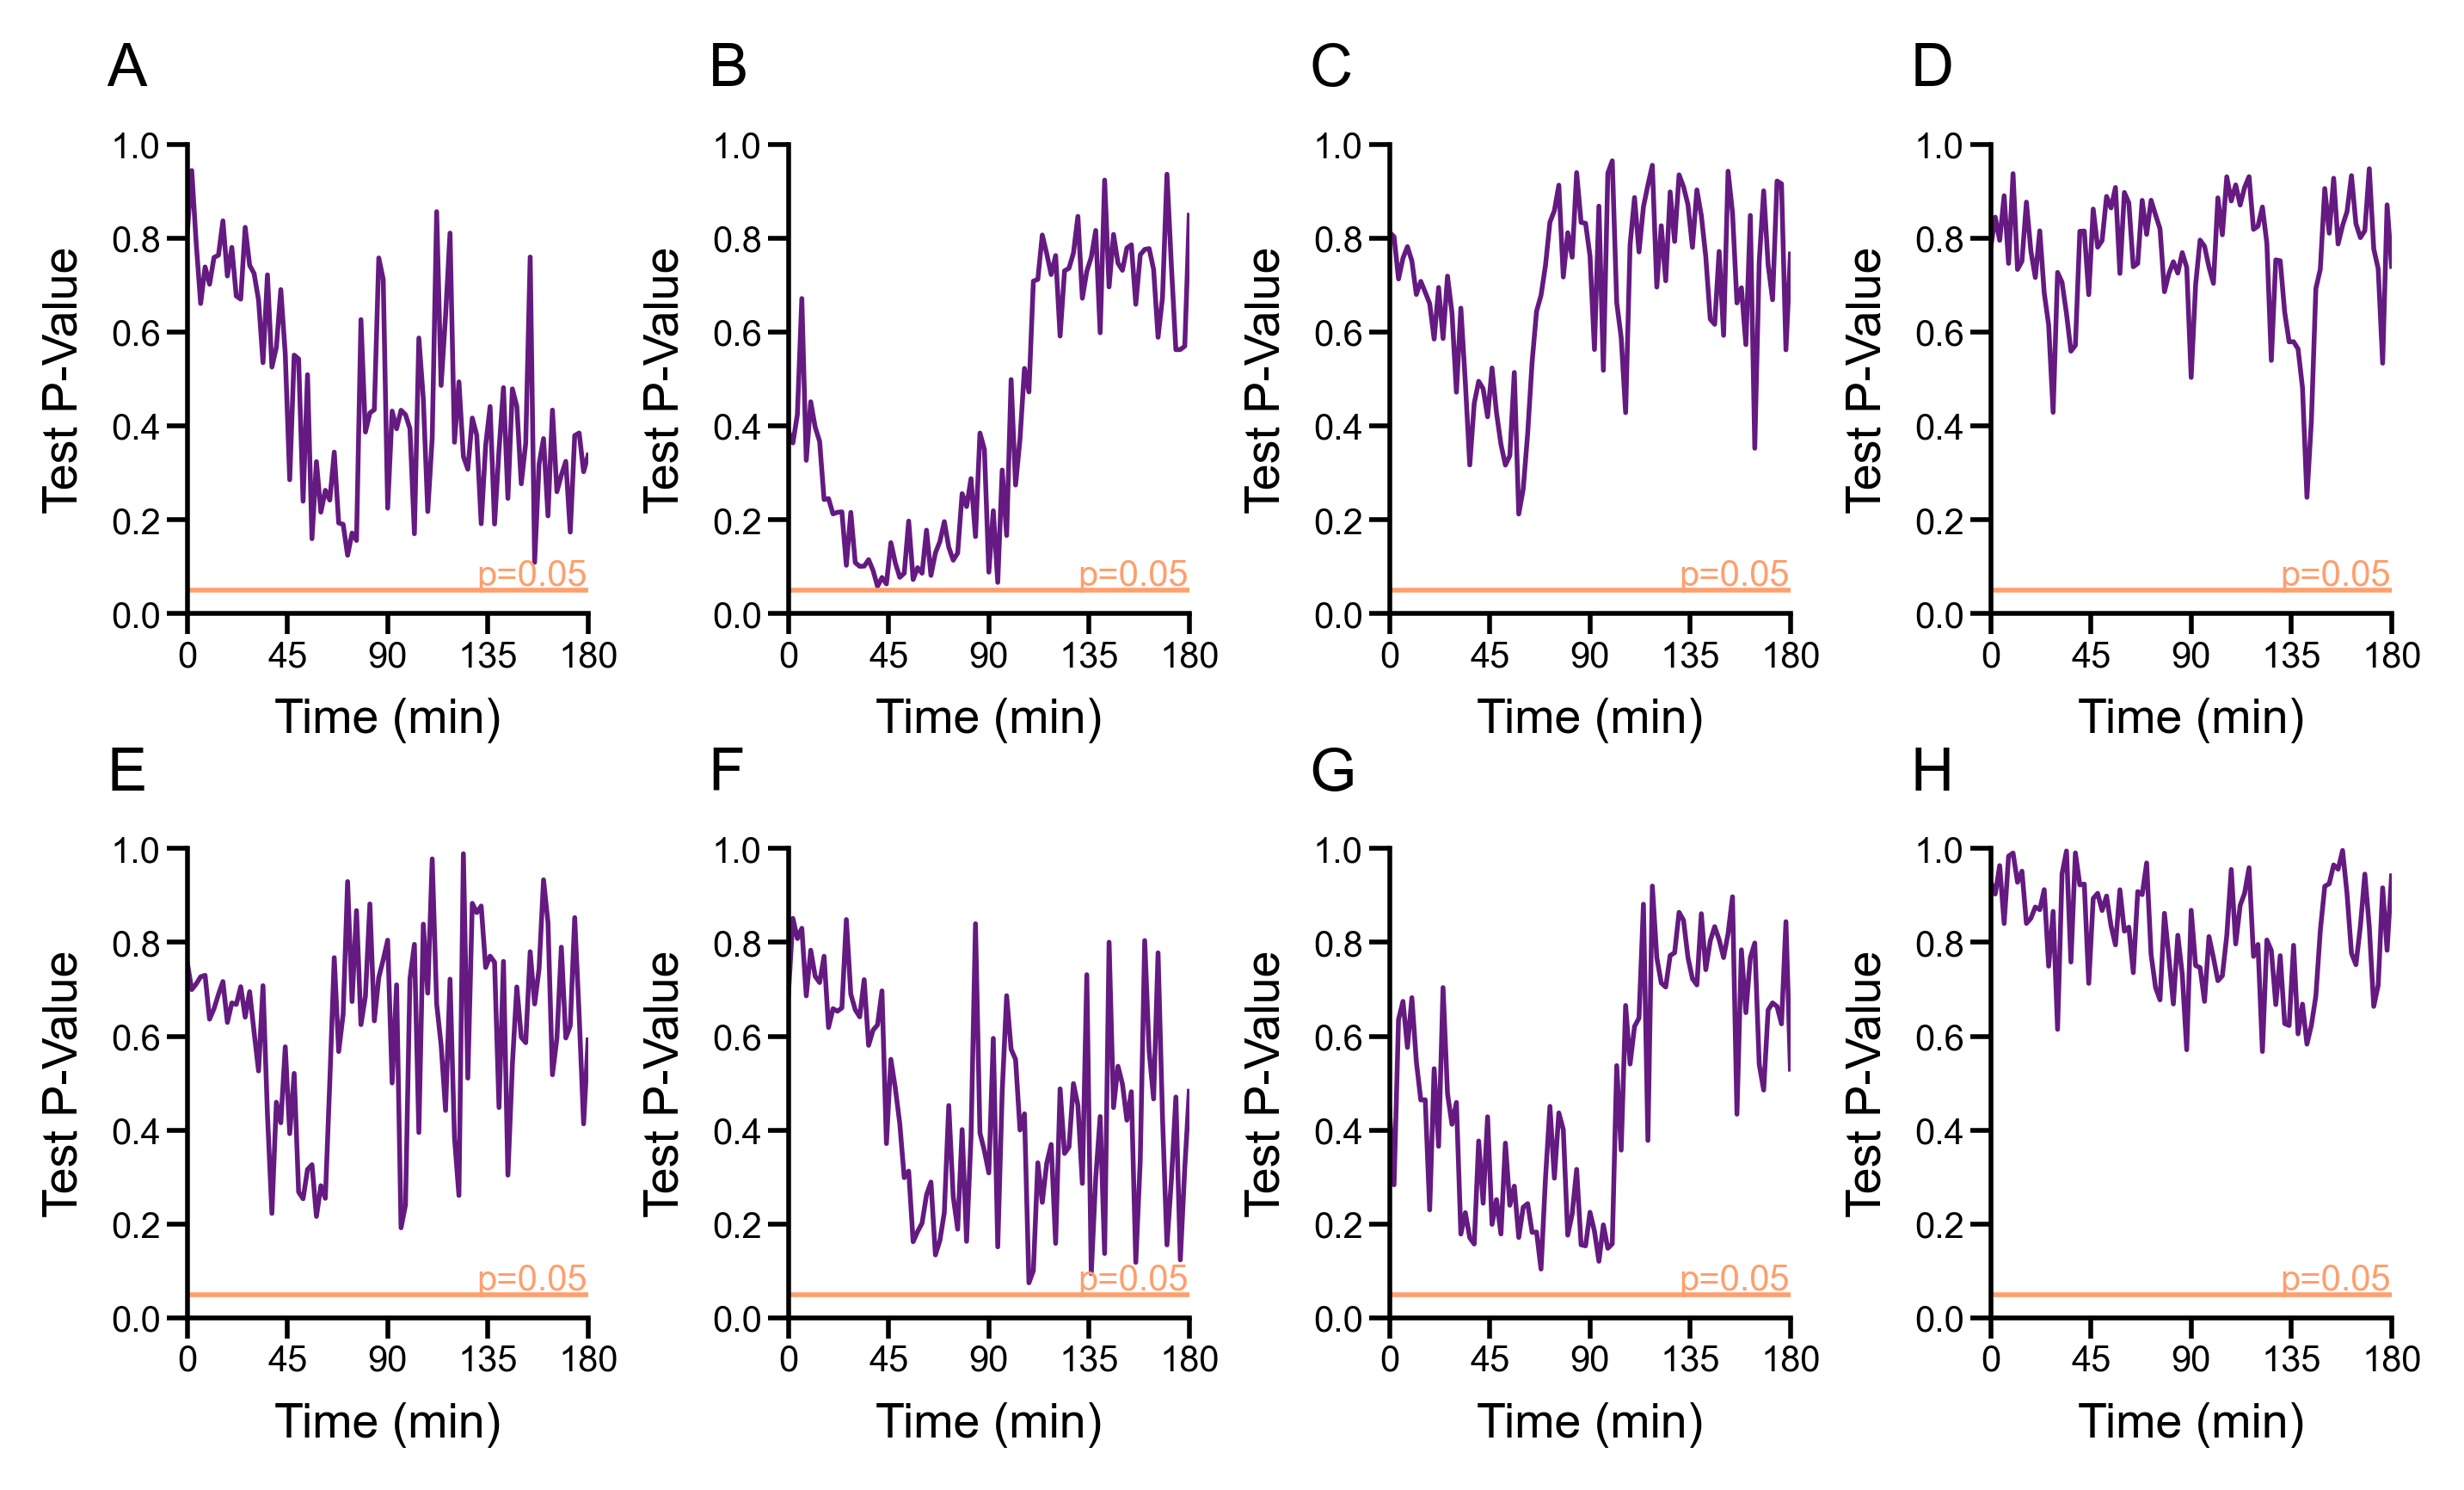

In [9]:
low_FAM_stats = pd.read_pickle('../../data/pickled_data/low_FAM_stats.pkl')
med_FAM_stats = pd.read_pickle('../../data/pickled_data/med_FAM_stats.pkl')
neg_FAM_stats = pd.read_pickle('../../data/pickled_data/neg_FAM_stats.pkl')
high_FAM_stats = pd.read_pickle('../../data/pickled_data/high_FAM_stats.pkl')
neg_TAMRA_stats = pd.read_pickle('../../data/pickled_data/neg_TAMRA_stats.pkl')
low_TAMRA_stats = pd.read_pickle('../../data/pickled_data/low_TAMRA_stats.pkl')
med_TAMRA_stats = pd.read_pickle('../../data/pickled_data/med_TAMRA_stats.pkl')
high_TAMRA_stats = pd.read_pickle('../../data/pickled_data/high_TAMRA_stats.pkl')


d =  [low_FAM_stats, med_FAM_stats, neg_FAM_stats, high_FAM_stats, neg_TAMRA_stats, low_TAMRA_stats, med_TAMRA_stats, high_TAMRA_stats]

apa = [[0,0,0,0],
         [0,0,0,0]]

counter = 0
npa = lambda x: np.array(x)
for data in d:
    x = nk.tc(data.index)
    l = [[x, data['normality p-value']], [x, [0.05]*len(x)]]
    print(len(l), len(l[0][0]), len(l[0][1]), len(l[1][0]), len(l[1][1]))
    e = [npa([0]*len(x)), npa([0]*len(x))]
    print(len(e), len(e[0]), len(e[1]))

    row = counter // 4
    col = counter % 4

    apa[row][col] = nkp.AxisPackage(l, ['Normality P-Value', ['a = 0.05']], e, ['Time (min)', 'Test P-Value'])
    counter+=1


ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.3, 0.8, 1024))
colormap = mpl.colors.ListedColormap(colors)

f, a = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(16.8*cm, 9*cm), publish_ready=False, dpi=500, legend=False, colormap=colormap)

ltrs = iter(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
for axa in a:
    for ax in axa:
        ax.set_ylim(0, 1)
        ax.set_xlim(0, 180)
        ax.set_xticks([0, 45, 90, 135, 180])
        ax.text(-0.2, 1.1, next(ltrs), transform=ax.transAxes, fontsize='medium', va='bottom', fontfamily='arial')
        ax.text(130, 0.06, 'p=0.05', fontsize=6, fontfamily='arial', color=colormap(.9999))
        

f.subplots_adjust(wspace=.5, hspace=.5)

plt.savefig('./charts/si/normality.png', dpi=2000, bbox_inches='tight')


#fig9.tight_layout(rect=[0, 0.03, 1, 0.95])

"""sx, sy = axs2.shape
for row in range(sx):
    for col in range(sy):
        a = axs2[row, col]
        a.hlines(0.05, 0, a.get_xlim()[1], color='red')
        a.set_ylabel('Fluorescence Intensity (AFU)', fontsize=14)
        a.title.set_size(18)
        axs2[row,col].set_xlabel('Time (s)', fontsize=14)
"""


In [10]:
len(x)

91

# Ex/Em Spectra

In [11]:
fam_em = pd.read_excel('../../data/raw_data/20230908_reporter_spectra.xls.xlsx', sheet_name='fam3', header=0,  index_col=0, skiprows=[1,2])
tamra_ex = pd.read_excel('../../data/raw_data/20230908_reporter_spectra.xls.xlsx', sheet_name='tamra5', header=0, index_col=0, skiprows=[1,2])

In [12]:
fam_em.drop(columns=[c for c in fam_em.columns if 'Wavelength' in c], inplace=True)
tamra_ex.drop(columns=[c for c in tamra_em.columns if 'Wavelength' in c], inplace=True)




NameError: name 'tamra_em' is not defined

In [ ]:
print(fam_em.index.min(), '  to  ', fam_em.index.max())
print(tamra_ex.index.min(), '  to  ', tamra_ex.index.max())

490   to   650
400   to   580


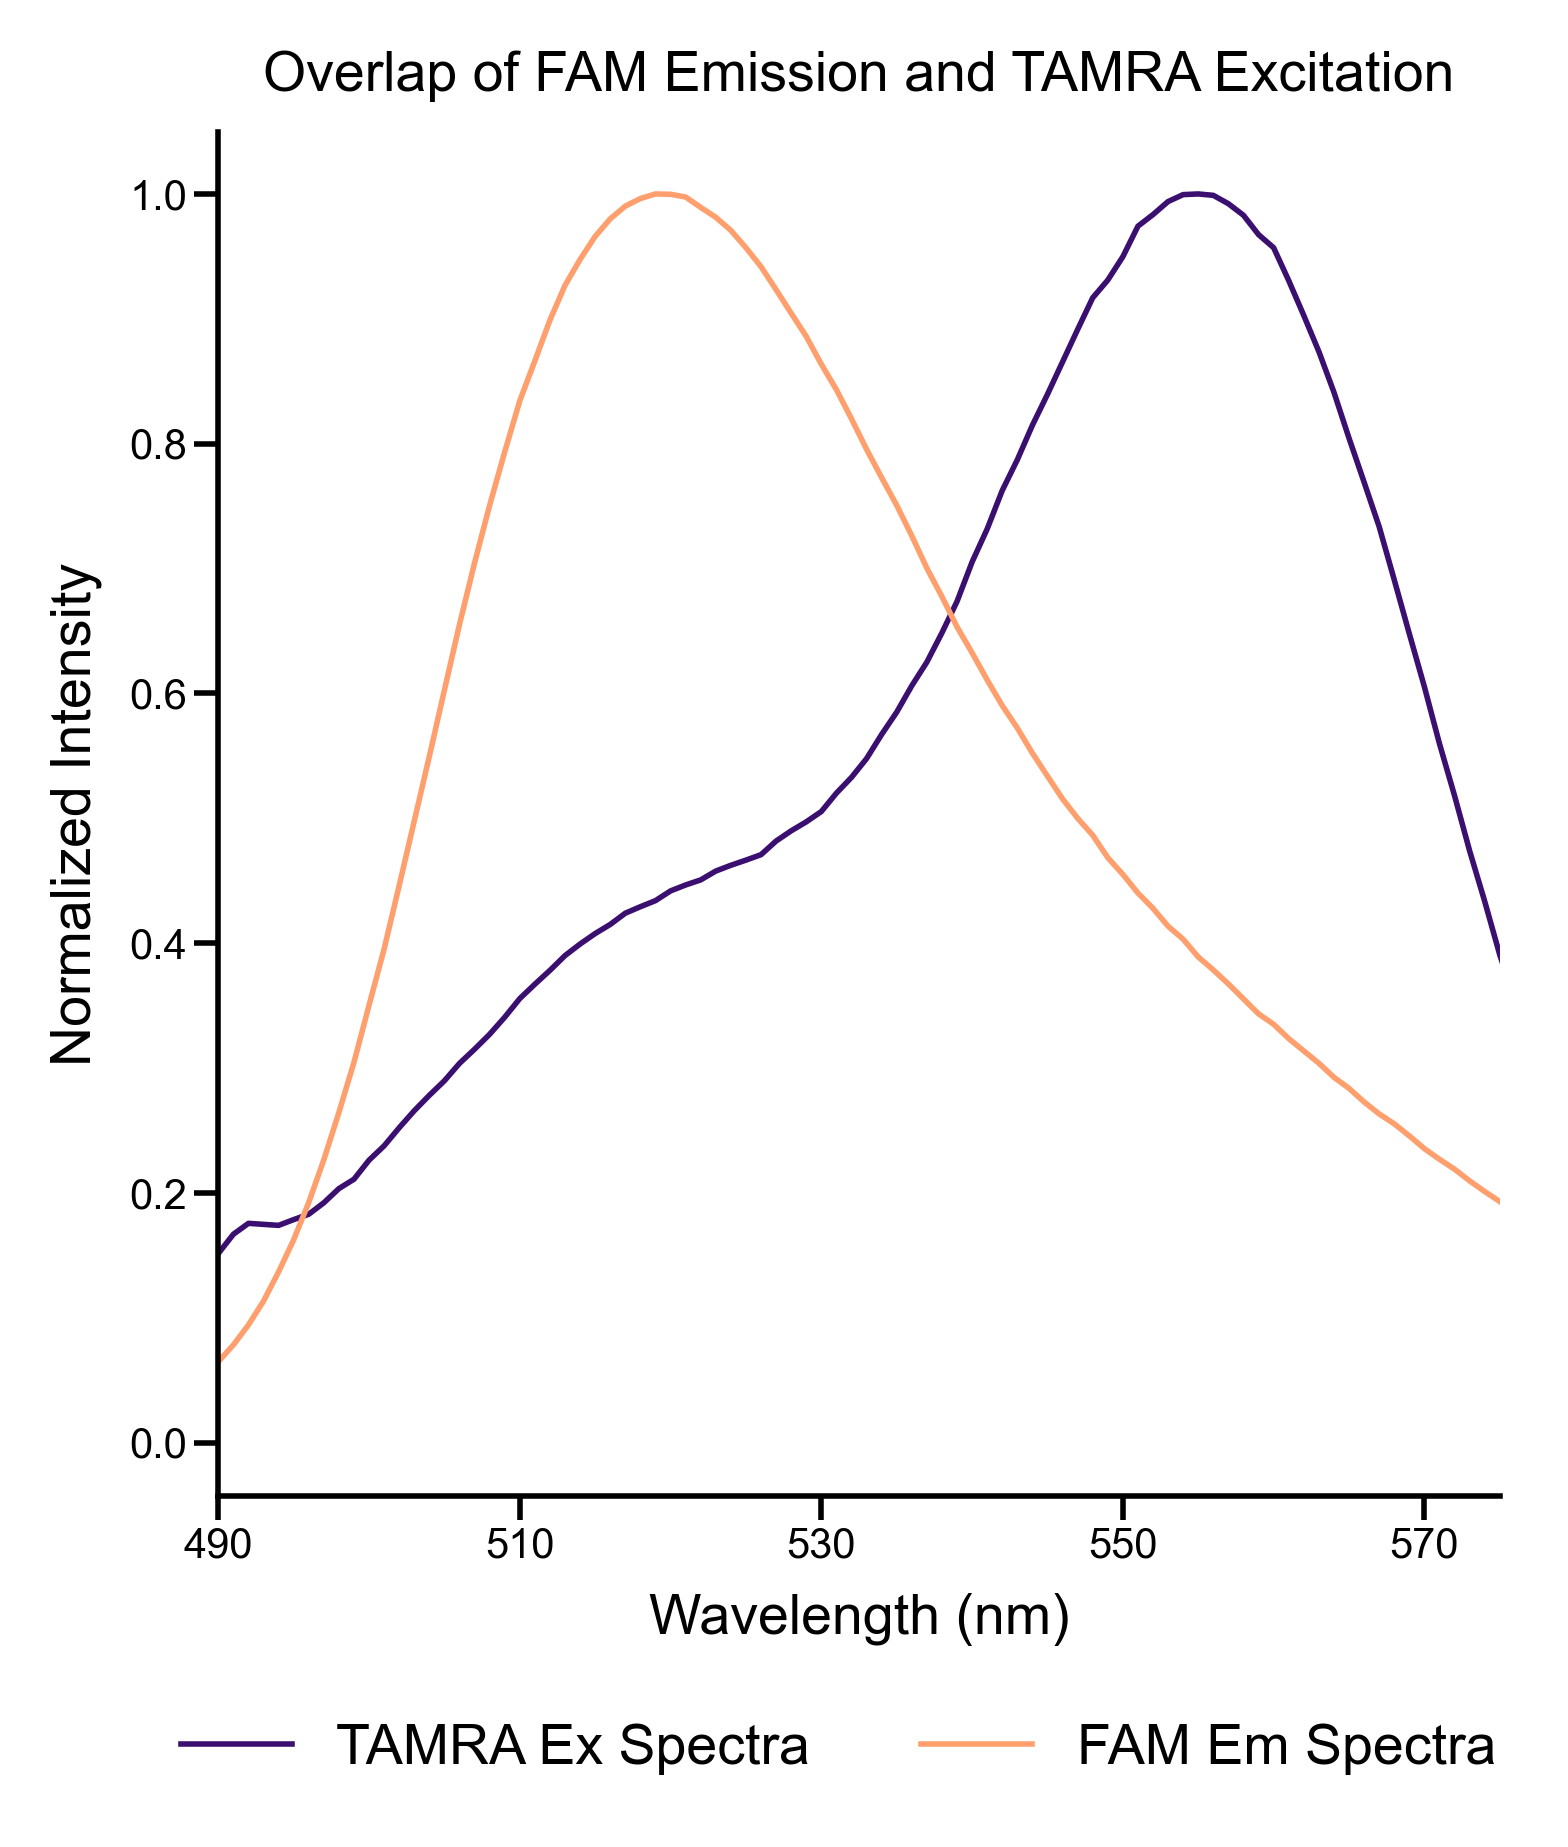

In [ ]:


l = [[tamra_ex.index, tamra_ex['S1']/tamra_ex['S1'].max()], [fam_em.index, fam_em['S1']/fam_em['S1'].max()]]
e= [npa([0]*len(tamra_ex.index)), npa([0]*len(fam_em.index))]
ap = nkp.AxisPackage(l, ['TAMRA Ex Spectra', 'FAM Em Spectra'], e, ['Wavelength (nm)', 'Normalized Intensity'])


apa = [[ap]]
ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.2,.8, 1024))
colormap = mpl.colors.ListedColormap(colors)
f, a = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(8.4*cm, 9*cm), publish_ready=False, dpi=500, legend=True, colormap=colormap)
aa = a[0][0]
aa.set_title('Overlap of FAM Emission and TAMRA Excitation', fontsize=8)
aa.set_xlim(490, 575)
aa.set_xticks([490, 510, 530, 550, 570])

f.savefig('./charts/si/fret_spectra.png', dpi=2000, bbox_inches='tight')



# Shading vs Dots errbars

In [ ]:
print(dttdat.bhq_0.fam)

        E1   E2   E3
Time                
0       97  104  100
120    112  109  108
240    115  107  109
360    113  120  119
480    115  128  115
...    ...  ...  ...
10320  128  129  136
10440  131  138  134
10560  129  138  133
10680  129  137  128
10800  127  134  134

[91 rows x 3 columns]


(57.9956335298277, 655.9162216889499)
bhq_0
bhq_1
bhq_5
bhq_10


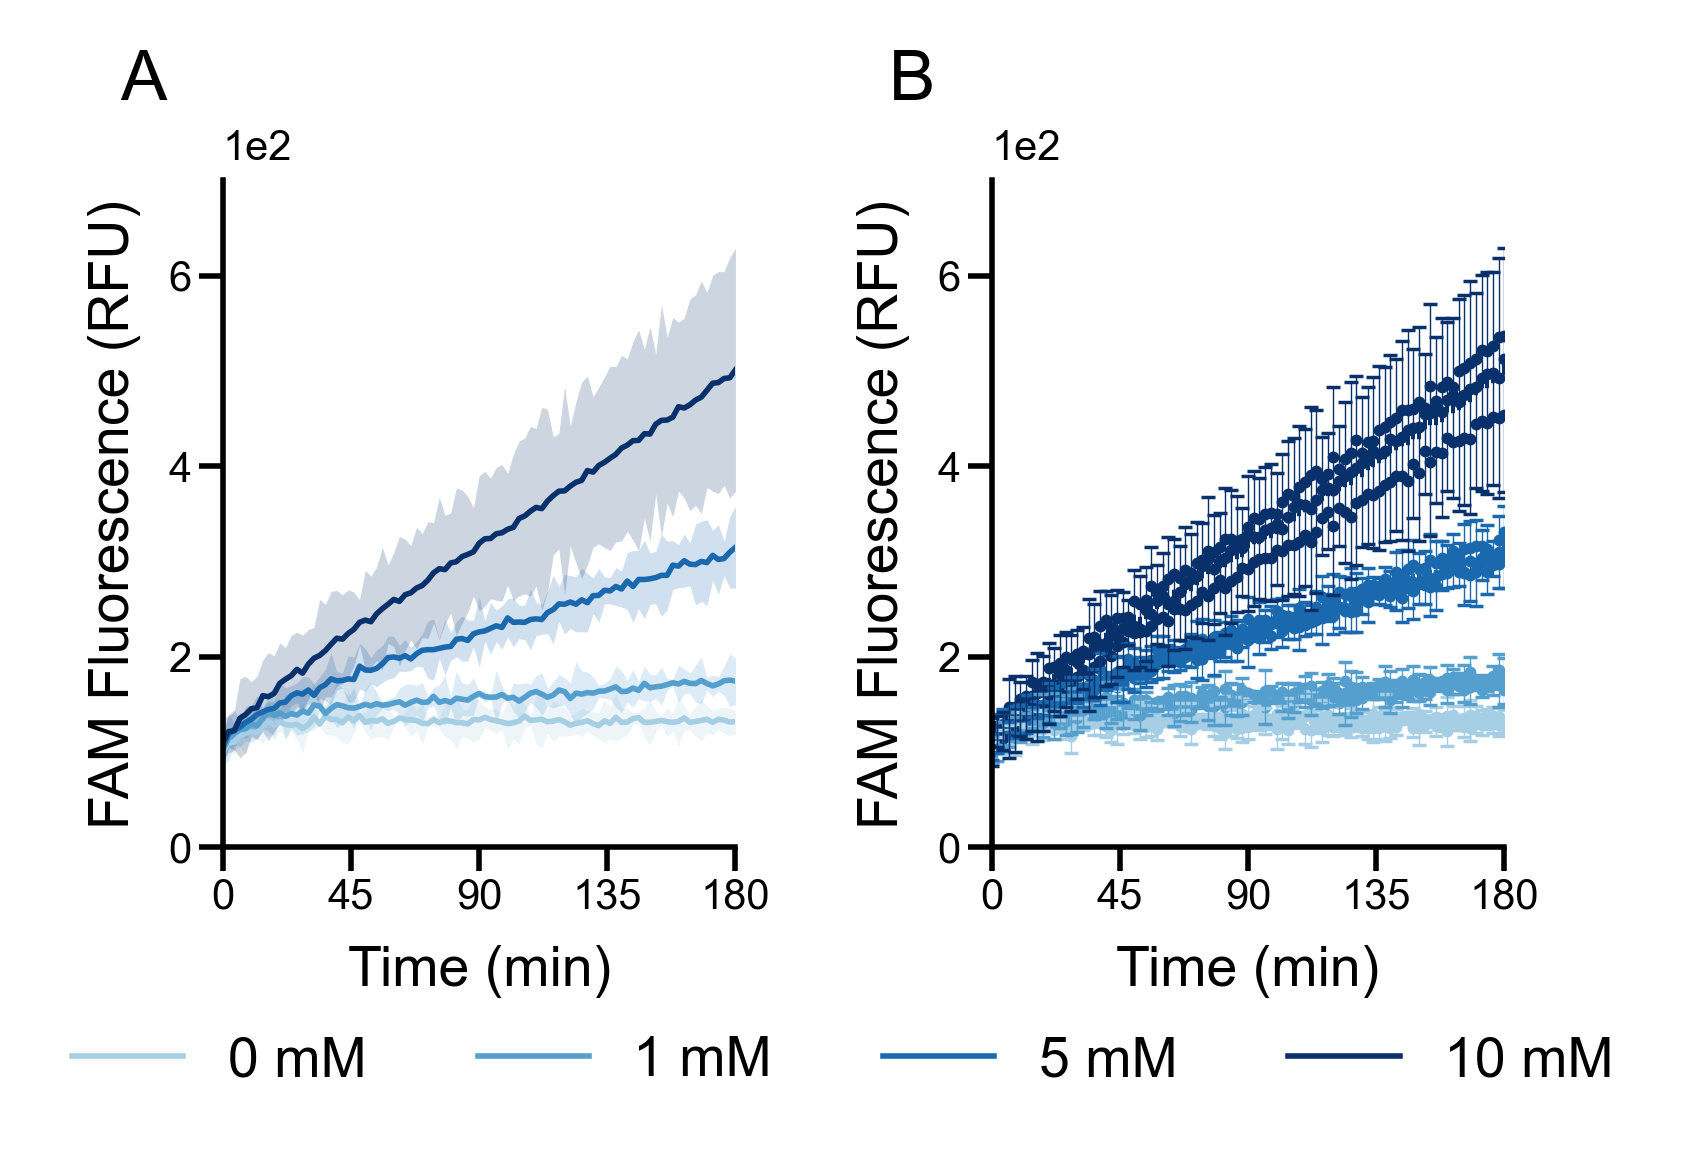

In [ ]:
# Read the Data for plot 2c (bhq in dtt)
#F = '../../data/raw_data/DTT_TRY3_NEWDAY.csv'
F = '../../data/raw_data/dtttry3try2.csv'

well_dict = {
    'tamra_0': ['A1', 'A2', 'A3'],
    'tamra_1': ['B1', 'B2', 'B3'],
    'tamra_5': ['C1', 'C2', 'C3'],
    'tamra_10': ['D1', 'D2', 'D3'],
    'bhq_0': ['E1', 'E2', 'E3'],
    'bhq_1': ['F1', 'F2', 'F3'],
    'bhq_5': ['G1', 'G2', 'G3'],
    'bhq_10': ['H1', 'H2', 'H3']
}

dttdat = nk.read_and_process_general_conc_quotient_data(F, well_dict)

x_bhq = nk.tc(dttdat.bhq_0.fam.index)
lns_bhq = [[x_bhq, dttdat.bhq_0.fam.mean(axis=1)], [x_bhq, dttdat.bhq_1.fam.mean(
    axis=1)], [x_bhq, dttdat.bhq_5.fam.mean(axis=1)], [x_bhq, dttdat.bhq_10.fam.mean(axis=1)]]
errs_bhq = [dttdat.bhq_0.fam.std(axis=1), dttdat.bhq_1.fam.std(
    axis=1), dttdat.bhq_5.fam.std(axis=1), dttdat.bhq_10.fam.std(axis=1)]
labels_bhq = ['0 mM', '1 mM', '5 mM', '10 mM']
axis_names_bhq = ['Time (min)', 'FAM Fluorescence (RFU)']

bhq_axp = nkp.AxisPackage(lns_bhq, labels_bhq, errs_bhq, axis_names_bhq)


axis_packages = [[bhq_axp, bhq_axp]]
fig, ax = nkp.general_lineplot_errorfill(
    axis_packages, stdmult=std_mult, neg_std_mult=neg_std_mult, publish_ready=False, figsize=(8.4*cm, 4.4*cm), dpi=500, legend=False)

print(ax[0][0].get_ylim())

a = ax[0][0]
a.set_ylim([0, 700])
a.set_yticks([0, 200, 400, 600])
a.set_xticks([0, 45, 90, 135, 180])
a.set_xlim([0, 180])
a.tick_params(axis='both', which='major', pad=1)
a.text(-0.2, 1.1, 'A', transform=a.transAxes, fontsize='medium', va='bottom', fontfamily='arial')

a = ax[0][1]
a.cla()
a.set_ylim([0, 700])
a.set_yticks([0, 200, 400, 600])
a.set_xticks([0, 45, 90, 135, 180])
a.set_xlim([0, 180])
a.tick_params(axis='both', which='major', pad=1)
a.ticklabel_format(axis='y', style='sci', scilimits=(0,2))
a.yaxis.get_offset_text().set_fontsize(6)
a.set_ylabel('FAM Fluorescence (RFU)', fontsize=8)
a.set_xlabel('Time (min)', fontsize=8)
a.text(-0.2, 1.1, 'B', transform=a.transAxes, fontsize='medium', va='bottom', fontfamily='arial')

fig.subplots_adjust(wspace=.5, hspace=.5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
    fancybox=True, shadow=True, ncol=4, fontsize=8, frameon=False)

ocolormap = mpl.colormaps['Blues']
colors = ocolormap(np.linspace(0.35, 1.0, 1024))
colormap = mpl.colors.ListedColormap(colors)
clrs = iter(colormap(np.linspace(0, 1.0, 4)))



for k, v in well_dict.items():
    if 'bhq' in k:
        print(k)
        clr = next(clrs)
        for well in v:
            a.scatter(nk.tc(dttdat[k]['fam'].index), dttdat[k]['fam'][well], s=0.5, marker='o', color=clr, label=k)
        a.errorbar(nk.tc(dttdat[k]['fam'].index), dttdat[k]['fam'].mean(axis=1), yerr=3*dttdat[k]['fam'].std(axis=1), color=clr, linewidth=0, elinewidth=0.2, capsize=1, capthick=0.5)
        a.scatter(nk.tc(dttdat[k]['fam'].index), dttdat[k]['fam'].mean(axis=1), s=.25, marker='_', color=clr, label=k)
    else:
        continue

fig.savefig('./charts/si/charting_readable_comaprison.png', dpi=2000, bbox_inches='tight')
